# Produisez une étude de marché

## Préparation des données

Import librairies & configuration

In [0]:
# import des libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import pandas as pd
import scipy as sp
import scipy.stats as st

1/ Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage

In [128]:
# import données population 2013-2018
url_population = "https://raw.githubusercontent.com/xavierbarbier/openclassrooms/master/projet_5/data/FAOSTAT_population_2013_2017.csv"

population = pd.read_csv(url_population)

population.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,AFG,Afghanistan,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,32269.589,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,AFG,Afghanistan,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,33370.794,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,AFG,Afghanistan,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,34413.603,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,AFG,Afghanistan,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,35383.032,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,AFG,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN


In [129]:
# sélection population totale uniquement
population_total = population.loc[population["Code Élément"] == 511]

population_total = population_total.pivot_table(
    index=["Zone","Code zone"],
    columns = ["Année"], values=["Valeur"])

population_total = population_total.reset_index()

# calcul évolution 2013-2017
population_total["evolution_pop"]=round( ((population_total[(   'Valeur', 2017)] - population_total[(   'Valeur', 2013)])/population_total[(   'Valeur', 2013)])*100,1)

# Rangement colonnes
population_total.columns = ["Zone",'Code zone','2013',"2014","2015","2016","2017","evolution_pop"]

population_total = population_total.reset_index()

population_total.head(5)

,index,Zone,Code zone,2013,2014,2015,2016,2017,evolution_pop
0,0,Afghanistan,AFG,32269.589,33370.794,34413.603,35383.032,36296.113,12.5
1,1,Afrique du Sud,ZAF,53687.121,54544.186,55386.367,56207.646,57009.756,6.2
2,2,Albanie,ALB,2903.790,2896.305,2890.513,2886.438,2884.169,-0.7
3,3,Algérie,DZA,38140.133,38923.692,39728.025,40551.392,41389.189,8.5
4,4,Allemagne,DEU,81174.367,81450.378,81787.411,82193.768,82658.409,1.8


In [130]:
population_total.shape

(233, 9)

2/ proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays

In [0]:
# Import des données des bilans alimentaires
url_ani = "https://raw.githubusercontent.com/xavierbarbier/openclassrooms/master/projet_5/data/FAOSTAT_ani_2017.csv"
url_veg ="https://raw.githubusercontent.com/xavierbarbier/openclassrooms/master/projet_5/data/FAOSTAT_vege_2017.csv"


ani = pd.read_csv(url_ani)
veg = pd.read_csv(url_veg)

In [132]:
# Ajout de la variable origin
ani["origin"] = "animal"
veg["origin"] = "vegetal"

# On regroupe veg et ani en un unique dataframe, via une union
temp = ani.append(veg)

# Suppression de ani et veg
del ani, veg

# On renomme les colonnes de temp
temp.columns = ["xx","xx2","country_code","country",'xx3','element'
    ,'item_code','item','xx4',"year","unit","value",'xx5','xx6'
    ,'origin']

# Transformation de temp en table pivot
data = temp.pivot_table(
    index=["country_code","country","item_code","item","year","origin"],
    columns = ["element"], values=["value"], aggfunc=sum)

data.columns = ["tourists",'feed','other_uses', 'food_supply_kcalcapitaday','food_supply_quantity_kgcapitayr',
                "fat_supply_quantity_gcapitaday",'protein_supply_quantity_gcapitaday',
                'domestic_supply_quantity', 'export_quantity', 'import_quantity', 'food',  'waste',
                'production',"residue",'seed', 'processing', 'stock_variation']


data = data.reset_index()
data.head(5)


,country_code,country,item_code,item,year,origin,tourists,feed,other_uses,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,fat_supply_quantity_gcapitaday,protein_supply_quantity_gcapitaday,domestic_supply_quantity,export_quantity,import_quantity,food,waste,production,residue,seed,processing,stock_variation
0,1,Arménie,2511,Blé,2017,vegetal,NaN,105.0,0.0,1053.0,132.49,3.97,31.35,558.0,1.0,337.0,390.0,10.0,176.0,-31.0,25.0,60.0,-45.0
1,1,Arménie,2513,Orge,2017,vegetal,NaN,91.0,6.0,4.0,0.54,0.02,0.15,114.0,0.0,14.0,2.0,10.0,93.0,-12.0,13.0,4.0,-7.0
2,1,Arménie,2514,Maïs,2017,vegetal,NaN,32.0,NaN,68.0,7.48,0.60,2.64,58.0,0.0,48.0,22.0,4.0,10.0,0.0,0.0,0.0,1.0
3,1,Arménie,2515,Seigle,2017,vegetal,NaN,0.0,NaN,1.0,0.14,0.01,0.03,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Arménie,2516,Avoine,2017,vegetal,NaN,6.0,NaN,7.0,0.65,0.12,0.26,7.0,NaN,1.0,2.0,0.0,6.0,-2.0,1.0,NaN,0.0


In [133]:
# dimensions du df
data.shape

(15766, 23)

* 15766 lignes par 23 colonnes

In [134]:
# préparation pour merge population 2017
population_2017 = population_total[["Zone","Code zone","2017"]]

# Merge data & population 2017
#Merge data + population
bilan = pd.merge(data,population_2017,left_on= "country", right_on= "Zone")

# Suppression colonne doublon
del bilan["Zone"]

bilan.head(5)

,country_code,country,item_code,item,year,origin,tourists,feed,other_uses,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,fat_supply_quantity_gcapitaday,protein_supply_quantity_gcapitaday,domestic_supply_quantity,export_quantity,import_quantity,food,waste,production,residue,seed,processing,stock_variation,Code zone,2017
0,1,Arménie,2511,Blé,2017,vegetal,NaN,105.0,0.0,1053.0,132.49,3.97,31.35,558.0,1.0,337.0,390.0,10.0,176.0,-31.0,25.0,60.0,-45.0,ARM,2944.791
1,1,Arménie,2513,Orge,2017,vegetal,NaN,91.0,6.0,4.0,0.54,0.02,0.15,114.0,0.0,14.0,2.0,10.0,93.0,-12.0,13.0,4.0,-7.0,ARM,2944.791
2,1,Arménie,2514,Maïs,2017,vegetal,NaN,32.0,NaN,68.0,7.48,0.60,2.64,58.0,0.0,48.0,22.0,4.0,10.0,0.0,0.0,0.0,1.0,ARM,2944.791
3,1,Arménie,2515,Seigle,2017,vegetal,NaN,0.0,NaN,1.0,0.14,0.01,0.03,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ARM,2944.791
4,1,Arménie,2516,Avoine,2017,vegetal,NaN,6.0,NaN,7.0,0.65,0.12,0.26,7.0,NaN,1.0,2.0,0.0,6.0,-2.0,1.0,NaN,0.0,ARM,2944.791


In [135]:
# dimensions du df
bilan.shape

(15766, 25)

In [136]:
# recherche valeur nulles
print(pd.isnull(bilan).sum())

country_code                              0
country                                   0
item_code                                 0
item                                      0
year                                      0
origin                                    0
tourists                              10351
feed                                  11640
other_uses                            10577
food_supply_kcalcapitaday              1550
food_supply_quantity_kgcapitayr        1408
fat_supply_quantity_gcapitaday         1514
protein_supply_quantity_gcapitaday     1519
domestic_supply_quantity                142
export_quantity                        3891
import_quantity                         782
food                                   1528
waste                                 10033
production                             5604
residue                                3421
seed                                  13669
processing                            12278
stock_variation                 

In [0]:
# remplacer les valeurs inconnues par la moyenne de la variable
bilan = bilan.fillna(bilan.mean()) 

In [0]:
# calcul disponibilité alimentaire
bilan["alim_supply"] = bilan["food"]+bilan["feed"]

In [0]:
# Regroupement par pays et origines
protein = bilan.groupby(["country", "origin"]).sum()
protein = protein.reset_index()

In [140]:
protein.head(5)

,country,origin,country_code,item_code,year,tourists,feed,other_uses,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,fat_supply_quantity_gcapitaday,protein_supply_quantity_gcapitaday,domestic_supply_quantity,export_quantity,import_quantity,food,waste,production,residue,seed,processing,stock_variation,2017,alim_supply
0,Afghanistan,animal,24,32974,24204,2.202770,3838.829375,1971.800347,190.000000,67.420000,13.260000,10.560000,2707.0,1338.676211,170.00000,2447.000000,731.354788,4755.533753,-15.490887,939.805913,8970.381881,81.582125,435553.356,6285.829375
1,Afghanistan,vegetal,140,181470,141190,12.849492,20129.678623,10490.765465,2485.545301,403.947078,37.075768,61.722003,12432.0,3412.220042,4582.43126,15674.415929,6071.112507,50095.374434,-172.963548,5478.958989,47209.504874,782.921795,2540727.910,35804.094553
2,Afrique du Sud,animal,4444,60668,44374,2.019206,5730.744062,1540.036616,454.000000,131.800000,32.410000,34.560000,8180.0,1325.867621,1345.71563,7515.000000,2064.612768,8119.000000,-114.079951,1844.629471,15698.168291,57.186593,1254214.632,13245.744062
3,Afrique du Sud,vegetal,14746,189132,147241,1.468513,26050.615124,11559.510888,2804.418120,489.795473,57.807165,56.459791,58660.0,9776.000000,7871.71563,27155.809102,6699.854526,75858.736272,-514.000000,4826.029566,55202.932053,-246.615641,4161712.188,53206.424226
4,Albanie,animal,66,60668,44374,4.038412,7076.275812,1613.291193,1094.000000,473.160000,75.290000,66.320000,1412.0,947.073347,102.00000,1363.000000,1987.064364,4652.300630,-146.079951,1784.629471,15698.168291,106.977656,63451.718,8439.275812


In [141]:
# table pivot disponibilité proteine selon orgine par pays
protein = protein.pivot_table(
    index=["country"],
    columns = ["origin"], values=["protein_supply_quantity_gcapitaday"])

protein.columns = ["protein_supply_quantity_animal", "protein_supply_quantity_vegetal"]

protein = protein.reset_index()

# Calcul du ratio proteine animal
protein["protein_ani_ratio"] = protein["protein_supply_quantity_animal"]/(protein["protein_supply_quantity_vegetal"]+protein["protein_supply_quantity_animal"])

# Extraction 20 pays au plus fort ratio
protein.sort_values(["protein_ani_ratio"], axis=0, ascending=False, inplace=True)
protein = protein.reset_index()
protein.head(20)[["country","protein_ani_ratio"]] 

,country,protein_ani_ratio
0,Mongolie,0.651428
1,Islande,0.648032
2,Antigua-et-Barbuda,0.622016
3,Polynésie française,0.620176
4,États-Unis d'Amérique,0.609220
5,Australie,0.606201
6,Bahamas,0.600109
7,Danemark,0.597822
8,Suède,0.589503
9,Saint-Kitts-et-Nevis,0.583295


3/ disponibilité alimentaire en protéines par habitant & disponibilité alimentaire en calories par habitant.

In [142]:
food = bilan.groupby(["country"]).sum()

food.columns = ["country_code","item_code","year","tourists",'feed','other_uses', 'food_supply_kcalcapitaday','food_supply_quantity_kgcapitayr',
                "fat_supply_quantity_gcapitaday",'protein_supply_quantity_gcapitaday',
                'domestic_supply_quantity', 'export_quantity', 'import_quantity', 'food',  'waste',
                'production',"residue",'seed', 'processing', 'stock_variation',"2017","alim_supply"]
food = food.reset_index()
food = food[["country","food_supply_kcalcapitaday","protein_supply_quantity_gcapitaday"]]

food.head(5)

,country,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday
0,Afghanistan,2675.545301,72.282003
1,Afrique du Sud,3258.418120,91.019791
2,Albanie,3874.981711,132.904634
3,Algérie,3616.418120,100.509791
4,Allemagne,3830.418120,111.729791


Regroupement

In [143]:
# Préparation merge population_2017 & food
population_2017 = population_total[["Zone","Code zone","evolution_pop"]]

# merge population_2017 & food
data = pd.merge(food,population_2017,left_on="country", right_on="Zone")

# Suppression colonne en doublon
del data["Zone"]

data.head(5)

,country,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,Code zone,evolution_pop
0,Afghanistan,2675.545301,72.282003,AFG,12.5
1,Afrique du Sud,3258.418120,91.019791,ZAF,6.2
2,Albanie,3874.981711,132.904634,ALB,-0.7
3,Algérie,3616.418120,100.509791,DZA,8.5
4,Allemagne,3830.418120,111.729791,DEU,1.8


In [144]:
# Préparation merge data & protein
protein=protein[["country","protein_ani_ratio"]]

# merge population_2017 & food
data = pd.merge(data,protein,left_on="country", right_on="country")

data.set_index("country",inplace=True)

data.head(5)

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,Code zone,evolution_pop,protein_ani_ratio
country,,,,,
Afghanistan,2675.545301,72.282003,AFG,12.5,0.146094
Afrique du Sud,3258.418120,91.019791,ZAF,6.2,0.379698
Albanie,3874.981711,132.904634,ALB,-0.7,0.499004
Algérie,3616.418120,100.509791,DZA,8.5,0.265223
Allemagne,3830.418120,111.729791,DEU,1.8,0.564576


In [145]:
# recherche valeur nulles
print(pd.isnull(data).sum())

food_supply_kcalcapitaday             0
protein_supply_quantity_gcapitaday    0
Code zone                             0
evolution_pop                         0
protein_ani_ratio                     2
dtype: int64


In [146]:
print(data.loc[pd.isna(data["protein_ani_ratio"]), :].index)

Index(['Bermudes', 'Brunéi Darussalam'], dtype='object', name='country')


* 2 valeurs nulles pour protein_ani_ratio
* Valeurs manquantes pour 'Bermudes', 'Brunéi Darussalam'.
* imputation par la moyenne

In [0]:
# remplacer les valeurs inconnues par la moyenne de la variable
data = data.fillna(data.mean()) 

In [148]:
# recherche valeur nulles
print(pd.isnull(data).sum())

food_supply_kcalcapitaday             0
protein_supply_quantity_gcapitaday    0
Code zone                             0
evolution_pop                         0
protein_ani_ratio                     0
dtype: int64


In [0]:
# Conservation données complètes 
data_full = data.copy()
data_full.columns = ["food_supply_kcalcapitaday","protein_supply_quantity_gcapitaday", "code","evolution_pop","protein_ani_ratio"]


In [150]:
data_full.shape

(171, 5)

## Analyse descriptives des données

In [0]:
# préparation des données
del data["Code zone"]

In [152]:
# Tendances centrales 
data.describe()

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio
count,171.000000,171.000000,171.000000,171.000000
mean,3128.054157,88.277969,5.452632,0.383632
std,575.017569,22.526994,5.046050,0.145564
min,339.272651,9.574739,-5.400000,0.083064
25%,2781.918120,71.446002,1.850000,0.256227
50%,3127.199916,86.949895,4.900000,0.397125
75%,3600.736283,104.767265,9.100000,0.507515
max,4177.127181,155.702108,23.900000,0.651428


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


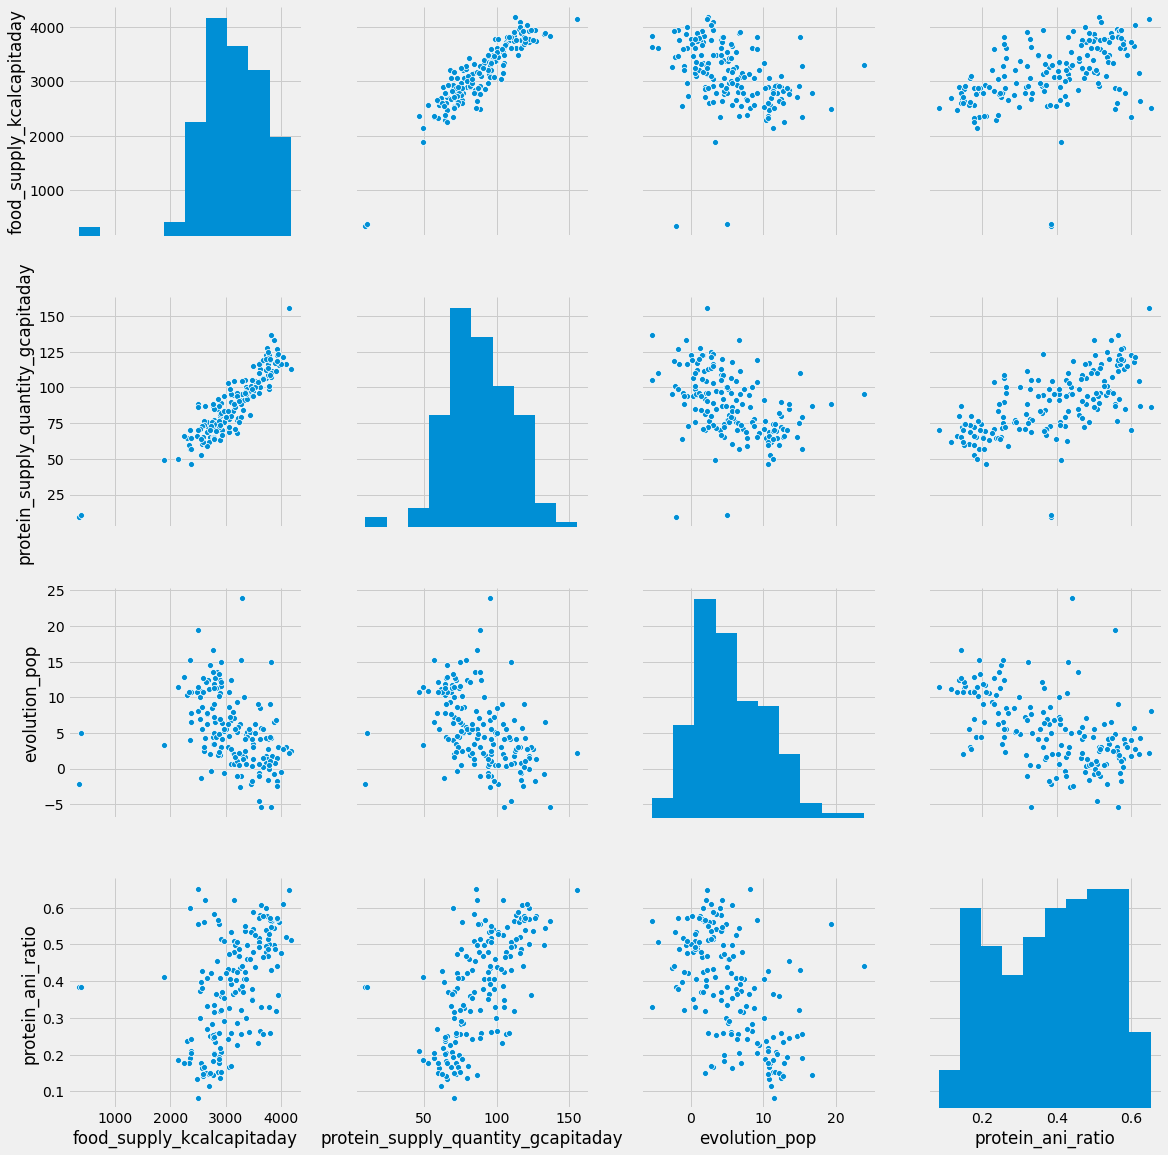

In [153]:
# Matrice par paires 
sns.pairplot(data, size = 4)

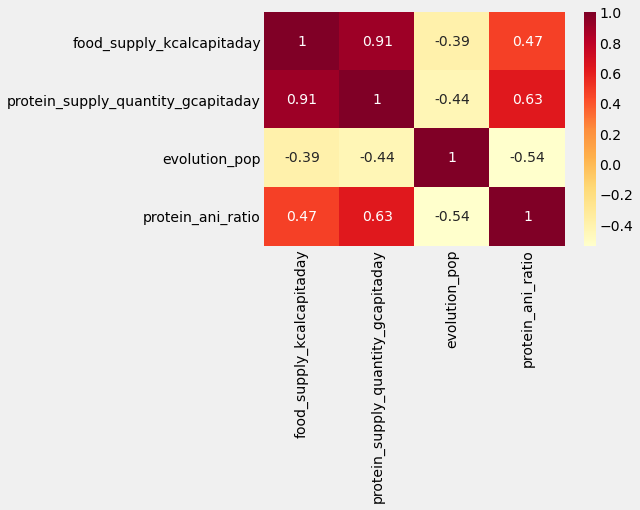

In [154]:
# Matrice corrélations
corr_matrix=data.corr()

sns.heatmap(corr_matrix,annot=True,cmap="YlOrRd")

## Classifications

In [0]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

### Classification 1

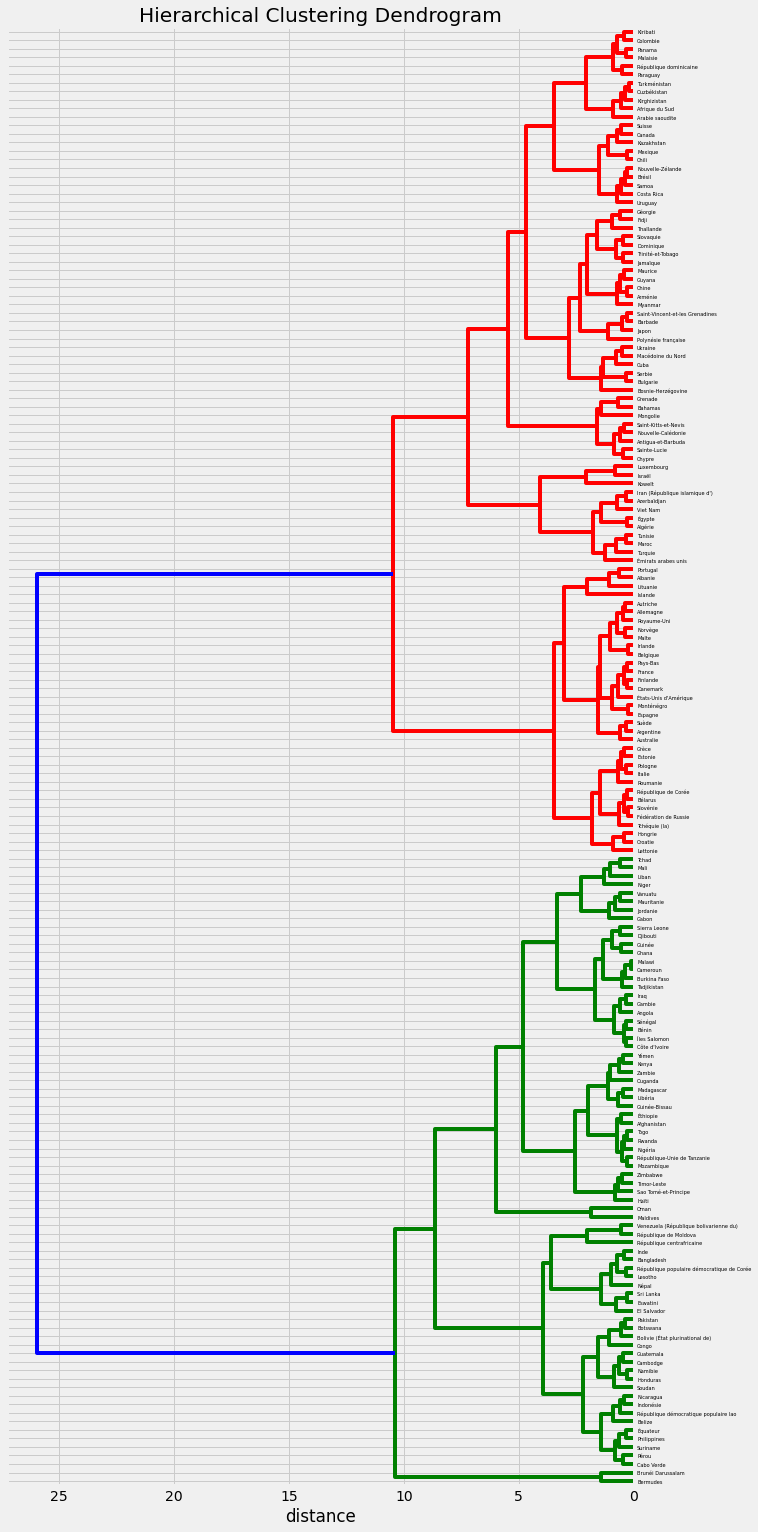

In [156]:
import pandas as pd
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from sklearn import preprocessing

# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

### Classification 2 ( 5 Clusters)

In [0]:
# fonction 5 clusters
def plot_dendrogram_5(Z, names):
    plt.figure(figsize=(10,6))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
      Z,
      truncate_mode='lastp',  # show only the last p merged clusters
      p=5,  # show only the last p merged clusters
      labels = names,
)
    plt.show()

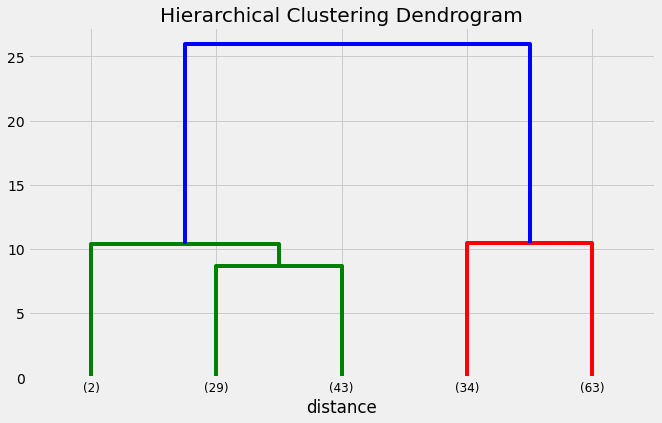

In [158]:
# Affichage du dendrogramme
plot_dendrogram_5(Z, names)

In [159]:
# Création df des clusters
k=5
clusters = pd.DataFrame(fcluster(Z, k, criterion='maxclust'))

# Renommage colonne
clusters.columns = ['clusters']

# Jointure externe data & cluster
data= pd.concat([data.reset_index(), clusters], axis=1)
data.set_index("country",inplace=True)
data.head(5)

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,clusters
country,,,,,
Afghanistan,2675.545301,72.282003,12.5,0.146094,3
Afrique du Sud,3258.418120,91.019791,6.2,0.379698,5
Albanie,3874.981711,132.904634,-0.7,0.499004,4
Algérie,3616.418120,100.509791,8.5,0.265223,5
Allemagne,3830.418120,111.729791,1.8,0.564576,4


In [160]:
# Nombre d'individus dans chaque cluster
data.groupby(["clusters" ]).count()

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio
clusters,,,,
1,2,2,2,2
2,29,29,29,29
3,43,43,43,43
4,34,34,34,34
5,63,63,63,63


* Cluster 1 avec 2 individus

In [161]:
# Valeurs moyennes par cluster
data.groupby(["clusters" ]).mean()

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio
clusters,,,,
1,356.236283,10.053475,1.450000,0.383632
2,2773.489594,72.487039,5.237931,0.309910
3,2719.147083,69.301600,11.920930,0.221379
4,3791.447507,117.468531,0.800000,0.538025
5,3300.334131,95.228616,3.774603,0.444989


* Cluster 1 avec données abérrantes

In [162]:
# Identification individus cluster 1
data[data["clusters"]==1]

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,clusters
country,,,,,
Bermudes,339.272651,9.574739,-2.1,0.383632,1
Brunéi Darussalam,373.199916,10.532212,5.0,0.383632,1


* Suppression individus cluster 1

In [0]:
# Suppression individus cluster 1
data = data[data["clusters"]!=1]

### Classifications 5 (sans outliers)

In [0]:
# préparation des données pour le clustering
del data["clusters"]
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

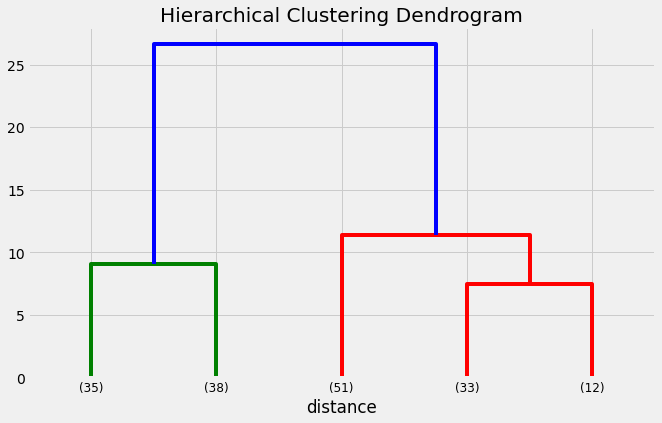

In [165]:
# Affichage du dendrogramme
plot_dendrogram_5(Z, names)

In [166]:
# Création df des clusters
k=5
clusters = pd.DataFrame(fcluster(Z, k, criterion='maxclust'))

# Renommage colonne
clusters.columns = ['clusters']

# Jointure externe data & cluster
data= pd.concat([data.reset_index(), clusters], axis=1)

data.head(5)

,country,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,clusters
0,Afghanistan,2675.545301,72.282003,12.5,0.146094,2
1,Afrique du Sud,3258.418120,91.019791,6.2,0.379698,3
2,Albanie,3874.981711,132.904634,-0.7,0.499004,4
3,Algérie,3616.418120,100.509791,8.5,0.265223,5
4,Allemagne,3830.418120,111.729791,1.8,0.564576,4


In [167]:
# Tendance moyenne cluster
data.set_index("country",inplace=True)
data.groupby(["clusters" ]).mean()

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio
clusters,,,,
1,2751.395783,71.265442,5.488571,0.299120
2,2738.633908,70.192428,12.576316,0.222640
3,3208.750737,91.995562,2.613725,0.470676
4,3813.216994,118.274633,1.318182,0.537877
5,3694.616582,109.915546,6.891667,0.345829


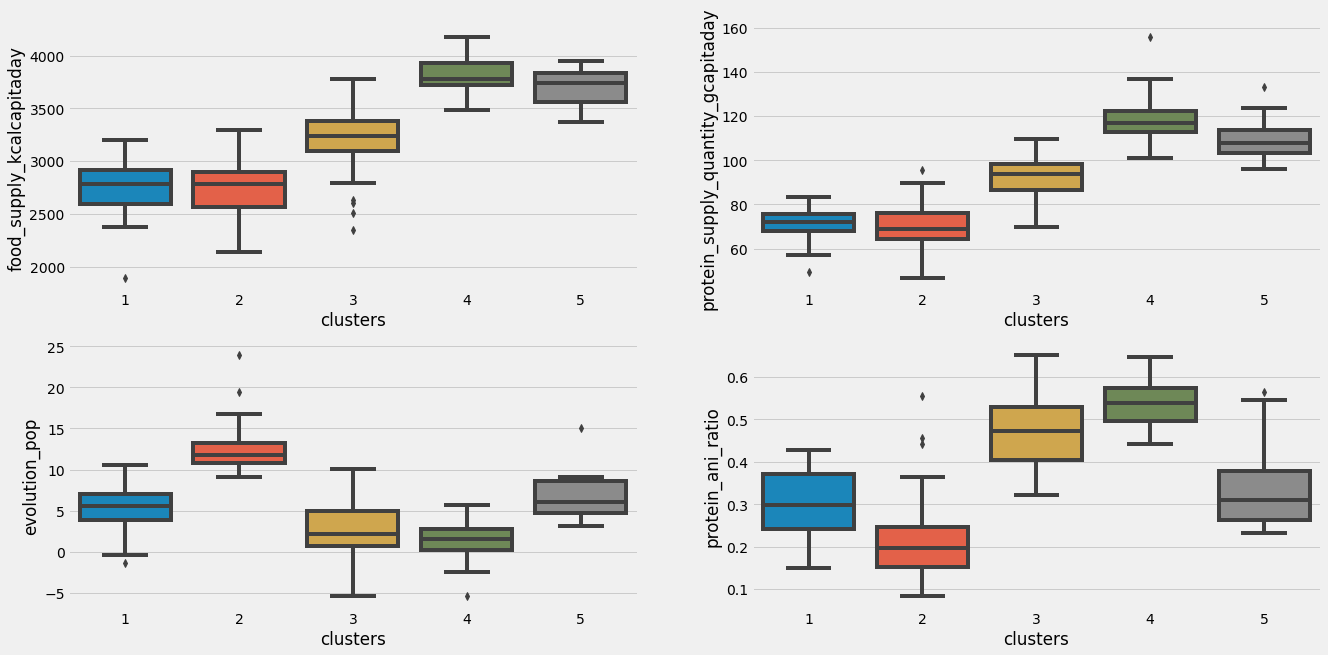

In [168]:
# Graphiques variables par clusters
plt.rcParams["figure.figsize"] = (20, 10)
plt.subplot(221)
sns.boxplot(x=data["clusters"], y = data["food_supply_kcalcapitaday"])
plt.subplot(222)
sns.boxplot(x=data["clusters"], y = data["protein_supply_quantity_gcapitaday"])
plt.subplot(223)
sns.boxplot(x=data["clusters"], y = data["evolution_pop"])
plt.subplot(224)
sns.boxplot(x=data["clusters"], y = data["protein_ani_ratio"])
plt.show()


In [169]:
#Localisation France
data.iloc[data.index=="France"]

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,clusters
country,,,,,
France,3929.199916,122.612212,1.5,0.568133,4


* France = cluster 4

In [170]:
# nombre de pays dans clusters de la France 
len(data.loc[data["clusters"]==4])

33

* 33 pays dans clusters 4

## ACP

In [0]:
# fonction ACP
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)


In [0]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram

### Eboulis des valeurs propres

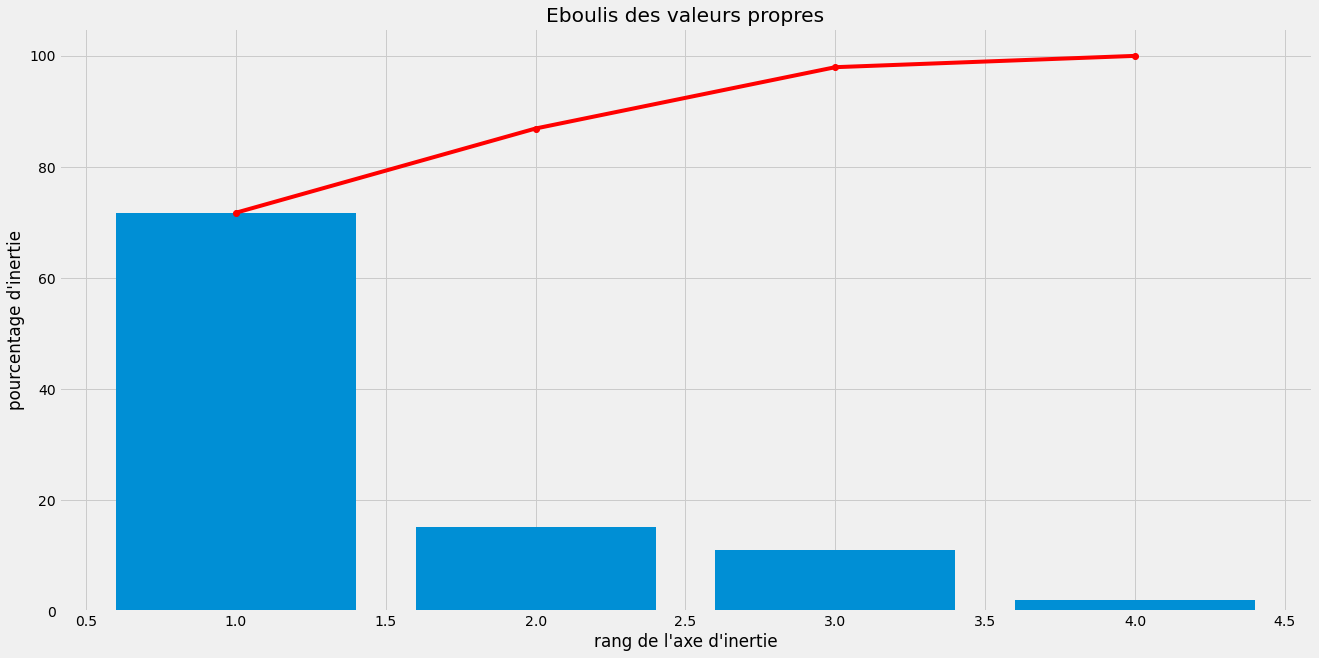

In [173]:
# choix du nombre de composantes à calculer
n_comp = 4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["food_supply_kcalcapitaday",	"protein_supply_quantity_gcapitaday",	"evolution_pop",	"protein_ani_ratio"	]]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data.index # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

* Choix de conserver composante 1 (méthode coude - critère de Kaiser 100/p, soit 25%)

### Cercles des corrélations

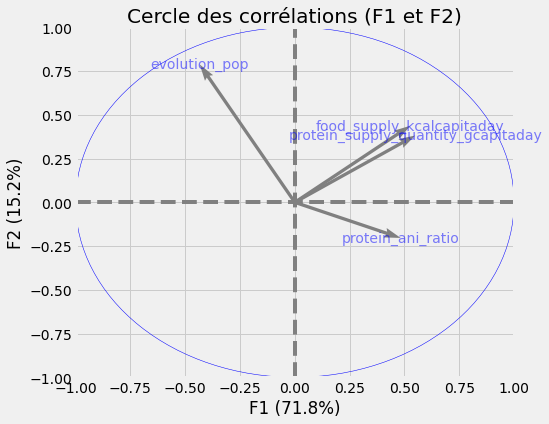

In [174]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

In [175]:
# composantes F1
# food",	"protein",	"pop",	"ratio"
f1 = pca.components_[0]
print(f1)

[ 0.52640076  0.54918607 -0.43382935  0.48279291]


In [176]:
# composantes F2
# food",	"protein",	"pop",	"ratio"
f2 = pca.components_[1]
print(f2)

[ 0.43766883  0.38197646  0.78811038 -0.20352399]


Interpétation cercle corrélations
* F1 caractérise les pays lesquels données alimentaires sont déjà importantes (3 vs 1).
* F2 caractérise les pays pour lesquels l'évolution de la population est importante.

In [177]:
# Projection des individus
X_projected = pca.transform(X_scaled)

# Obtention F1 & F2
data_fn = pd.DataFrame(X_projected, index=data.index,columns=["F"+str(i+1) for i in range(4)])
data_fn = data_fn.reset_index()
data_fn = data_fn[["country","F1", "F2"]]

# merge data & data_1
data = pd.merge(data,data_fn, left_on="country", right_on="country")
data.head(5)

,country,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,clusters,F1,F2
0,Afghanistan,2675.545301,72.282003,12.5,0.146094,2,-2.354880,0.686373
1,Afrique du Sud,3258.418120,91.019791,6.2,0.379698,3,0.078981,0.235453
2,Albanie,3874.981711,132.904634,-0.7,0.499004,4,2.830769,0.302727
3,Algérie,3616.418120,100.509791,8.5,0.265223,5,0.135388,1.248411
4,Allemagne,3830.418120,111.729791,1.8,0.564576,4,2.227880,0.176649


#### Projection des individus

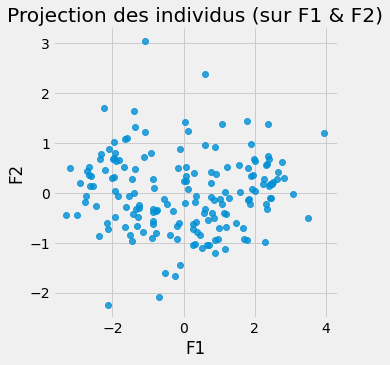

In [178]:
# Projection des individus selon variable illustrative
sns.lmplot(x="F1", y = "F2", data=data, fit_reg=False)
plt.title("Projection des individus (sur F1 & F2)")
plt.show()

#### Projection clusters

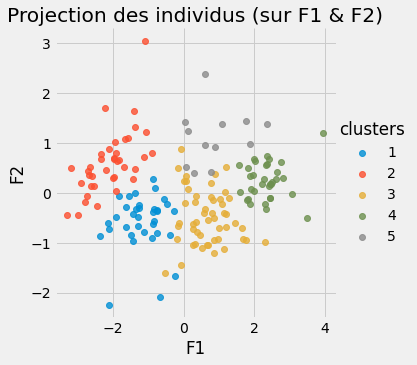

In [179]:
# Projection des individus selon variable illustrative
sns.lmplot(x="F1", y = "F2", hue="clusters", data=data, fit_reg=False)
plt.title("Projection des individus (sur F1 & F2)")
plt.show()

In [180]:
# Création df clusters

cluster_cent = pd.DataFrame(data.groupby(["clusters" ]).mean())
cluster_cent = cluster_cent.reset_index()
cluster_cent.head(10)

,clusters,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,F1,F2
0,1,2751.395783,71.265442,5.488571,0.299120,-1.189067,-0.577031
1,2,2738.633908,70.192428,12.576316,0.222640,-2.095513,0.609748
2,3,3208.750737,91.995562,2.613725,0.470676,0.661652,-0.480089
3,4,3813.216994,118.274633,1.318182,0.537877,2.334608,0.242551
4,5,3694.616582,109.915546,6.891667,0.345829,0.871709,1.125504


#### Projection centroides

In [181]:
# Conservation F1 & F2
cluster_cent = cluster_cent[["clusters","F1","F2"]]
cluster_cent.head(10)

,clusters,F1,F2
0,1,-1.189067,-0.577031
1,2,-2.095513,0.609748
2,3,0.661652,-0.480089
3,4,2.334608,0.242551
4,5,0.871709,1.125504


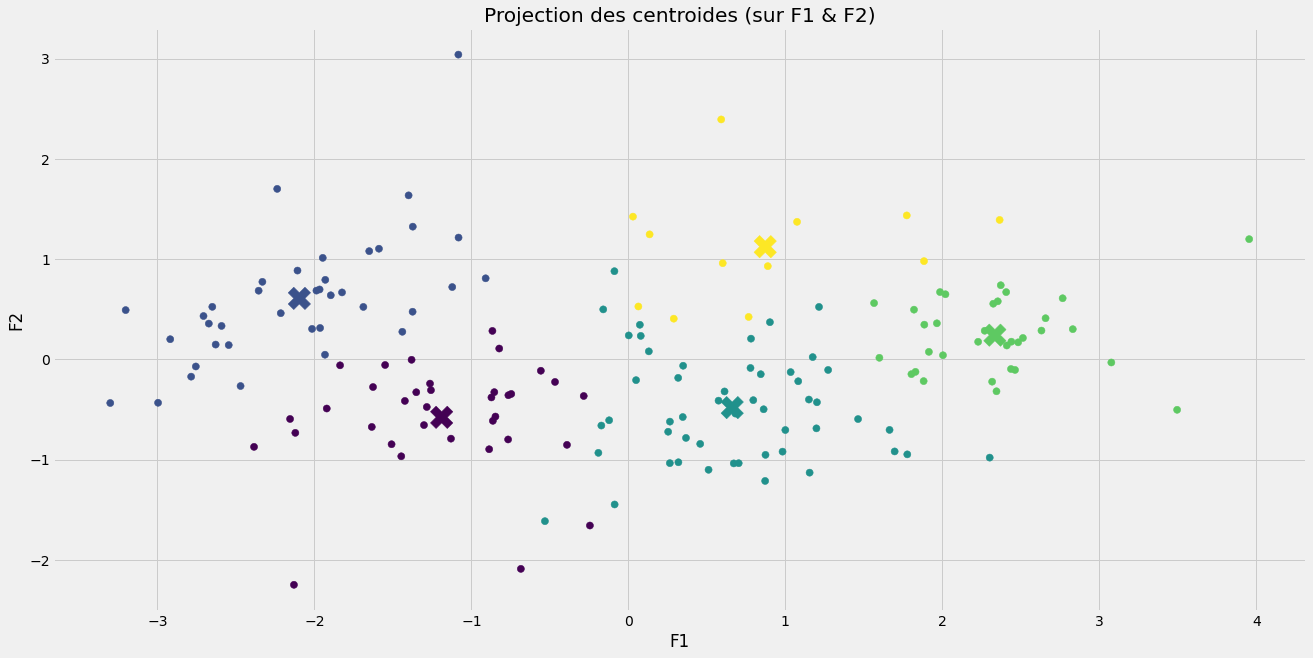

In [182]:
plt.scatter(x=cluster_cent["F1"], y = cluster_cent["F2"], c = cluster_cent["clusters"], s = 500, marker="X")
plt.scatter(x=data["F1"], y = data["F2"], c = data["clusters"], s = 50)
plt.title("Projection des centroides (sur F1 & F2)")
plt.xlabel("F1")
plt.ylabel("F2")
plt.show()

### Adhésion loi normale

#### Droites de Henry / qqPlot

In [0]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py 

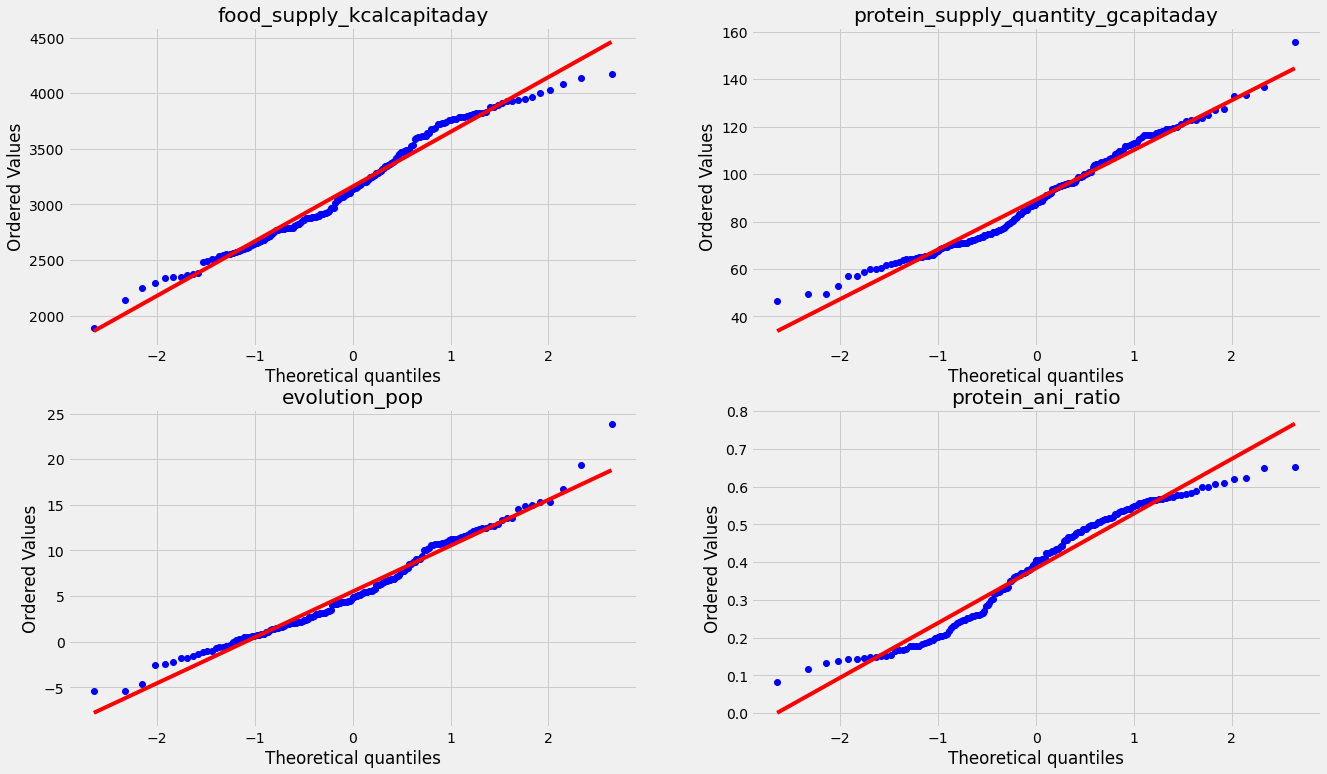

In [184]:
plt.rcParams["figure.figsize"] = (20, 12)
plt.subplot(221)
st.probplot(data["food_supply_kcalcapitaday"], plot=plt)
plt.title("food_supply_kcalcapitaday")

plt.subplot(222)
st.probplot(data["protein_supply_quantity_gcapitaday"], plot=plt)
plt.title("protein_supply_quantity_gcapitaday")

plt.subplot(223)
st.probplot(data["evolution_pop"], plot=plt)
plt.title("evolution_pop")

plt.subplot(224)
st.probplot(data["protein_ani_ratio"], plot=plt)
plt.title("protein_ani_ratio")


plt.show()

#### Kolmogorov-Smirnov

* H0 = il y a adhésion à loi normale.
* H1 = pas d'adhésion loi normale

In [185]:
#Kolmogorov-Smirnov
from scipy.stats import ks_2samp
print("1/pvalue food_supply_kcalcapitaday")
print(ks_2samp(data["food_supply_kcalcapitaday"],list(np.random.normal(np.mean(data["food_supply_kcalcapitaday"]), np.std(data["food_supply_kcalcapitaday"]), 1000))))

print("2/pvalue protein_supply_quantity_gcapitaday")
print(ks_2samp(data["protein_supply_quantity_gcapitaday"],list(np.random.normal(np.mean(data["protein_supply_quantity_gcapitaday"]), np.std(data["protein_supply_quantity_gcapitaday"]), 1000))))

print("3/pvalue evolution_pop")
print(ks_2samp(data["evolution_pop"],list(np.random.normal(np.mean(data["evolution_pop"]), np.std(data["evolution_pop"]), 1000))))

print("4/pvalue protein_ani_ratio")
print(ks_2samp(data["protein_ani_ratio"],list(np.random.normal(np.mean(data["protein_ani_ratio"]), np.std(data["protein_ani_ratio"]), 1000))))


1/pvalue food_supply_kcalcapitaday
Ks_2sampResult(statistic=0.08127218934911243, pvalue=0.27809264294289116)
2/pvalue protein_supply_quantity_gcapitaday
Ks_2sampResult(statistic=0.06469822485207101, pvalue=0.5554434595602105)
3/pvalue evolution_pop
Ks_2sampResult(statistic=0.11488165680473372, pvalue=0.04021647259781447)
4/pvalue protein_ani_ratio
Ks_2sampResult(statistic=0.1027810650887574, pvalue=0.0871761910402108)


#### Shapiro-Wilk

In [186]:
#Shapiro-Wilk

print("1/pvalue food_supply_kcalcapitaday")
print(sp.stats.shapiro(data["food_supply_kcalcapitaday"])[1])

print("1/pvalue protein_supply_quantity_gcapitaday")
print(sp.stats.shapiro(data["protein_supply_quantity_gcapitaday"])[1])

print("3/pvalue evolution_pop")
print(sp.stats.shapiro(data["evolution_pop"])[1])

print("4/pvalue protein_ani_ratio")
print(sp.stats.shapiro(data["protein_ani_ratio"])[1])


1/pvalue food_supply_kcalcapitaday
0.006611781660467386
1/pvalue protein_supply_quantity_gcapitaday
0.005935091990977526
3/pvalue evolution_pop
0.004654312040656805
4/pvalue protein_ani_ratio
2.6765515940496698e-05


* On peut rejetter l’hypothèse de normalité au niveau de test 5% pour l'ensemble des variables .

### Caractérisations clusters selon composantes

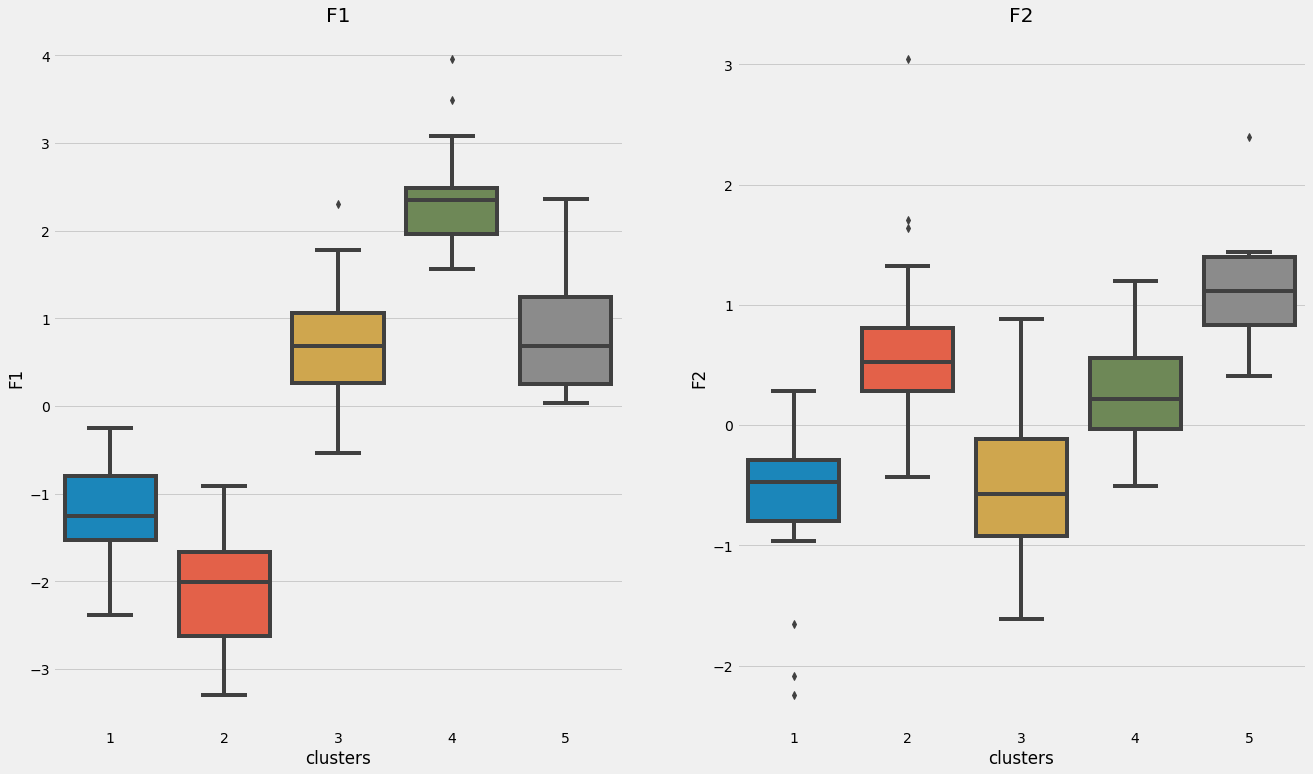

In [187]:
plt.subplot(121)
sns.boxplot( x=data["clusters"], y=data["F1"])
plt.title("F1")

plt.subplot(122)
sns.boxplot( x=data["clusters"], y=data["F2"])
plt.title("F2")
plt.show()

Clusters : 
1.   Données nutritives inf moyenne et population en faible augmentation
2.   Données nutritives inf moyenne et population en forte augmentation
3.   Données nutritives au dessus moyenne et population en faible augmentation
4.   Données nutritives au dessus moyenne et population en légère augmentation
5.   Données nutritives au dessus moyenne et population en forte augmentation

Le cluster 4 semble celui présentant le + de potentiel.




In [188]:
data.loc[data["country"]=="France"]

,country,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,clusters,F1,F2
48,France,3929.199916,122.612212,1.5,0.568133,4,2.65737,0.411605


* France dans cluster 4

In [189]:
len(data.loc[data["clusters"]==4])

33

* 33 Pays dans cluster 4

In [0]:
# Conservation données complètes cluster_4
cluster_4 = data[data["clusters"]==4]
cluster_4_full = cluster_4.copy()

In [191]:
cluster_4.sort_values(["F1"], axis=0, ascending=False, inplace=True)
print(len(cluster_4))
cluster_4["country"]

33


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


68                   Islande
83                  Lituanie
118                 Portugal
2                    Albanie
166    États-Unis d'Amérique
48                    France
47                  Finlande
39                  Danemark
114                 Pays-Bas
120                 Roumanie
116                  Pologne
97                Monténégro
44                   Estonie
16                  Belgique
67                   Irlande
11                  Autriche
43                   Espagne
91                     Malte
54                     Grèce
70                    Italie
4                  Allemagne
104                  Norvège
49      Fédération de Russie
10                 Australie
121              Royaume-Uni
143                    Suède
8                  Argentine
147            Tchéquie (la)
24                   Bélarus
141                   Suisse
138                 Slovénie
124      République de Corée
29                    Canada
Name: country, dtype: object

* Plusieurs pays hors UE.

# Cluster 4

In [0]:
# préparation données
cluster_4.set_index("country",inplace=True)
names = cluster_4.index 
temp = cluster_4[["F1","F2"]]

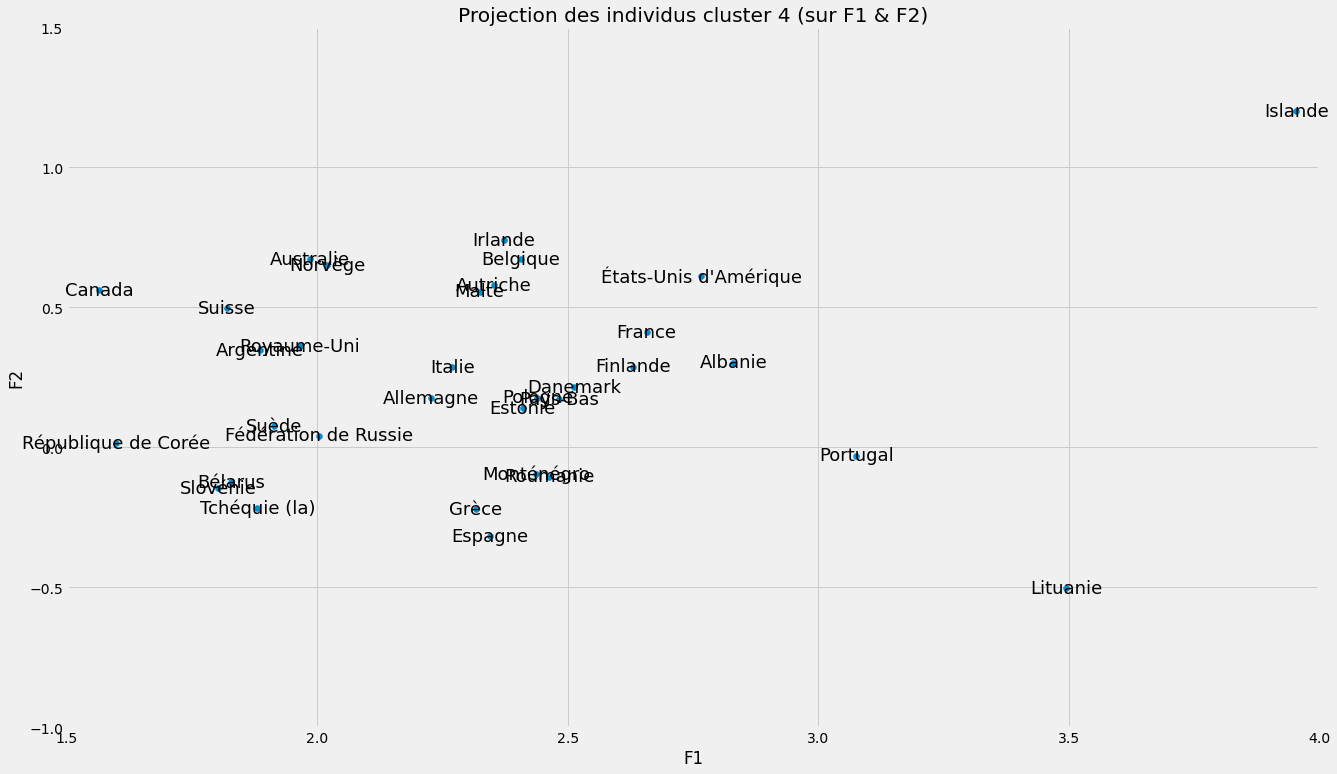

In [193]:
# Projection des individus

plt.scatter(np.array(temp)[:, 0], np.array(temp)[:, 1])
for i,(x,y) in enumerate(np.array(temp)[:,[0,1]]):
                    plt.text(x, y, names[i],
                              fontsize='18', ha='center',va='center')
                    
bound = np.max(np.abs(np.array(temp)[:,[0,1]])) * 1.1
plt.xlim([1.5,4])
plt.ylim([-1,1.5])
plt.title("Projection des individus cluster 4 (sur F1 & F2)")
plt.xlabel("F1")
plt.ylabel("F2")
plt.show()

# Ajout nouvelle variable : revenu median & importation vollailles
Sources : WorldBank

## Préparation des données

In [194]:
# import données revenu median 2013-2018
url_revenus = "https://raw.githubusercontent.com/xavierbarbier/openclassrooms/master/projet_5/data/revenu_median.csv"

revenus = pd.read_csv(url_revenus)

# Rangement colonnes
revenus.columns = ["country",'code',"2013","2017"]
del revenus["2013"]
revenus.head(5)

,country,code,2017
0,Afghanistan,AFG,466.079081442157
1,Albania,ALB,4105.15051492189
2,Algeria,DZA,3257.67687393948
3,American Samoa,ASM,..
4,Andorra,AND,..


In [0]:
# conversion valeurs nulles en NaN
revenus["2017"]=revenus["2017"].apply(pd.to_numeric, errors='coerce').dropna()

In [196]:
# recherche valeur nulles
print(pd.isnull(revenus).sum())

country     3
code        5
2017       51
dtype: int64


In [197]:
# localisation NaN's country
print(revenus.loc[pd.isna(revenus["country"]), :].index)

Int64Index([217, 218, 219], dtype='int64')


In [198]:
# Affichage NaN's country 
print(revenus.iloc[217,:])
print(revenus.iloc[218,:])
print(revenus.iloc[219,:])

country    NaN
code       NaN
2017       NaN
Name: 217, dtype: object
country    NaN
code       NaN
2017       NaN
Name: 218, dtype: object
country    NaN
code       NaN
2017       NaN
Name: 219, dtype: object


In [0]:
# suppression valeurs manquantes
revenus = revenus.drop([217 , 218, 219])

In [200]:
# localisation NaN's code
revenus = revenus.reset_index()
print(revenus.loc[pd.isna(revenus["code"]), :].index)

Int64Index([217, 218], dtype='int64')


In [201]:
# Affichage NaN's code
print(revenus.iloc[217,:])
print(revenus.iloc[218,:])


index                                                   220
country    Data from database: World Development Indicators
code                                                    NaN
2017                                                    NaN
Name: 217, dtype: object
index                           221
country    Last Updated: 02/27/2020
code                            NaN
2017                            NaN
Name: 218, dtype: object


In [0]:
# suppression valeurs manquantes
revenus = revenus.drop([217 , 218])
revenus = revenus.reset_index()

In [203]:
# recherche valeur nulles
print(pd.isnull(revenus).sum())

level_0     0
index       0
country     0
code        0
2017       46
dtype: int64


In [204]:
# Identification pays avec données manquantes
pb_revenus = revenus[revenus['2017'].isnull()]
print(pb_revenus["country"])

3                 American Samoa
4                        Andorra
6            Antigua and Barbuda
21                       Bermuda
27        British Virgin Islands
36                Cayman Islands
39               Channel Islands
47                 Cote d'Ivoire
49                          Cuba
50                       Curacao
61                       Eritrea
65                 Faroe Islands
69              French Polynesia
75                     Gibraltar
77                     Greenland
78                       Grenada
79                          Guam
86          Hong Kong SAR, China
94                   Isle of Man
103    Korea, Dem. People’s Rep.
105                       Kosovo
114                Liechtenstein
115                    Lithuania
117             Macao SAR, China
123                        Malta
124             Marshall Islands
128        Micronesia, Fed. Sts.
130                       Monaco
137                        Nauru
140                New Caledonia
146     No

In [0]:
# suppression données
revenus = revenus.dropna()

In [0]:
# suppression colonnes inutiles
del revenus["level_0"]
del revenus["index"]

# conservation données revenus
revenus_full = revenus.copy()

In [207]:
# merge revenus & data
data = pd.merge(data_full,revenus, left_on="code", right_on="code")

# renommage et rangement colonnes
data.columns = ["food_supply_kcalcapitaday","protein_supply_quantity_gcapitaday", "code","evolution_pop","protein_ani_ratio", "country","revenus"]
data.set_index("country",inplace=True)
data.head(5)

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,code,evolution_pop,protein_ani_ratio,revenus
country,,,,,,
Afghanistan,2675.545301,72.282003,AFG,12.5,0.146094,466.079081
South Africa,3258.418120,91.019791,ZAF,6.2,0.379698,4941.627549
Albania,3874.981711,132.904634,ALB,-0.7,0.499004,4105.150515
Algeria,3616.418120,100.509791,DZA,8.5,0.265223,3257.676874
Germany,3830.418120,111.729791,DEU,1.8,0.564576,37791.483568


In [208]:
data.shape

(157, 6)

In [209]:
# Préparation données production volailles
animal = bilan[bilan.origin != "vegetal"]
volailles = animal[animal.item == "Viande de Volailles"]

volailles = volailles[["country","import_quantity","Code zone"]]
volailles.columns=["country","import","code"]

#Conversion en milliers de tonnes en kg
volailles["import"] = volailles["import"]*1000*1000

volailles.head(5)

,country,import,code
70,Arménie,35000000.0,ARM
162,Afghanistan,29000000.0,AFG
244,Albanie,38000000.0,ALB
336,Algérie,2000000.0,DZA
433,Angola,277000000.0,AGO


In [210]:
# Préparation données population
population_2017 = population_total[["Code zone","2017"]]
population_2017.columns = ["code", "pop_2017"]
population_2017["pop_2017"]= population_2017["pop_2017"]*1000
population_2017.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,code,pop_2017
0,AFG,36296113.0
1,ZAF,57009756.0
2,ALB,2884169.0
3,DZA,41389189.0
4,DEU,82658409.0


In [211]:
# merge volailles & pop
volailles = pd.merge(volailles,population_2017, left_on="code", right_on="code")

# Calcul ratio par pers par jour
volailles["import_kgcapitaday"] = (volailles["import"]/volailles["pop_2017"])/365

#Nettoyage
del volailles["import"]
del volailles["pop_2017"]

volailles.head(5)

,country,code,import_kgcapitaday
0,Arménie,ARM,0.032563
1,Afghanistan,AFG,0.002189
2,Albanie,ALB,0.036097
3,Algérie,DZA,0.000132
4,Angola,AGO,0.025452


In [212]:
# merge volailles & data
data = pd.merge(data,volailles, left_on="code", right_on="code")
data.head(5)

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,code,evolution_pop,protein_ani_ratio,revenus,country,import_kgcapitaday
0,2675.545301,72.282003,AFG,12.5,0.146094,466.079081,Afghanistan,0.002189
1,3258.418120,91.019791,ZAF,6.2,0.379698,4941.627549,Afrique du Sud,0.024701
2,3874.981711,132.904634,ALB,-0.7,0.499004,4105.150515,Albanie,0.036097
3,3616.418120,100.509791,DZA,8.5,0.265223,3257.676874,Algérie,0.000132
4,3830.418120,111.729791,DEU,1.8,0.564576,37791.483568,Allemagne,0.027908


In [213]:
data.shape

(156, 8)

In [214]:
# recherche valeur nulles
print(pd.isnull(data).sum())

food_supply_kcalcapitaday             0
protein_supply_quantity_gcapitaday    0
code                                  0
evolution_pop                         0
protein_ani_ratio                     0
revenus                               0
country                               0
import_kgcapitaday                    0
dtype: int64


## ANALYSE DESCIPTIVE

In [215]:
#Description données 
data.describe()

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,revenus,import_kgcapitaday
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,3168.041655,88.948372,5.728846,0.377594,10531.436593,0.023813
std,495.087683,20.921784,5.070904,0.144604,14554.306691,0.038438
min,1889.709060,46.612317,-5.400000,0.083064,242.937497,0.000000
25%,2787.972672,71.885396,1.875000,0.251979,1364.108249,0.001125
50%,3146.454488,88.184791,5.100000,0.387206,4148.906447,0.009083
75%,3607.663548,105.171555,9.575000,0.499902,12359.080737,0.028245
max,4177.127181,155.702108,23.900000,0.651428,64306.962196,0.238418


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


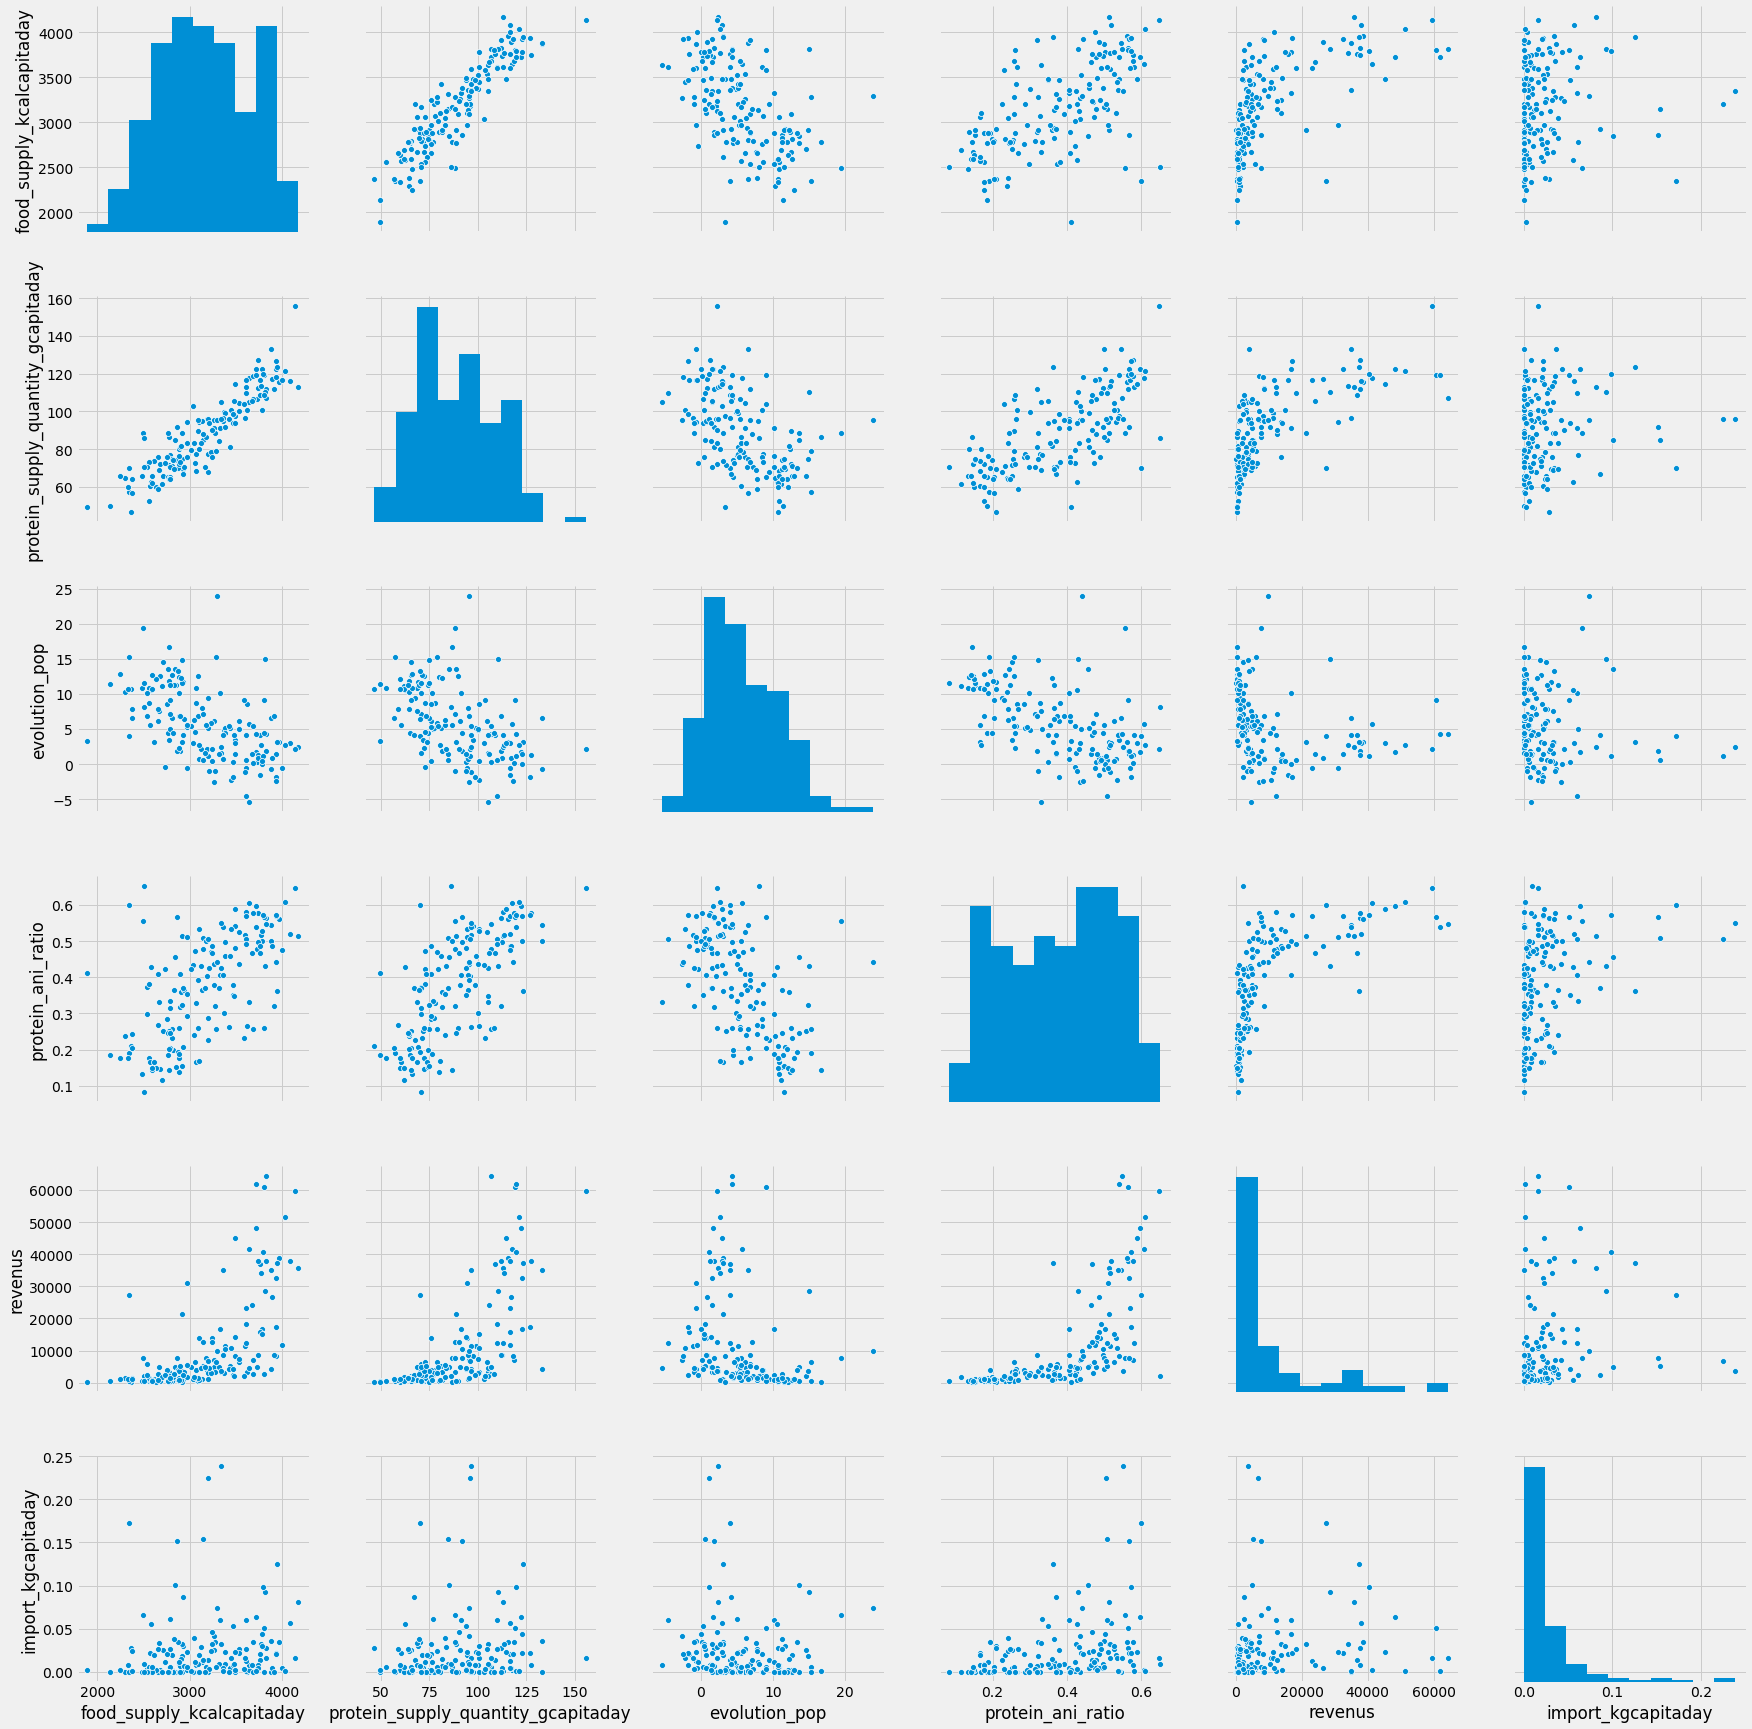

In [216]:
#Matrice par pairs
sns.pairplot(data, size = 4)

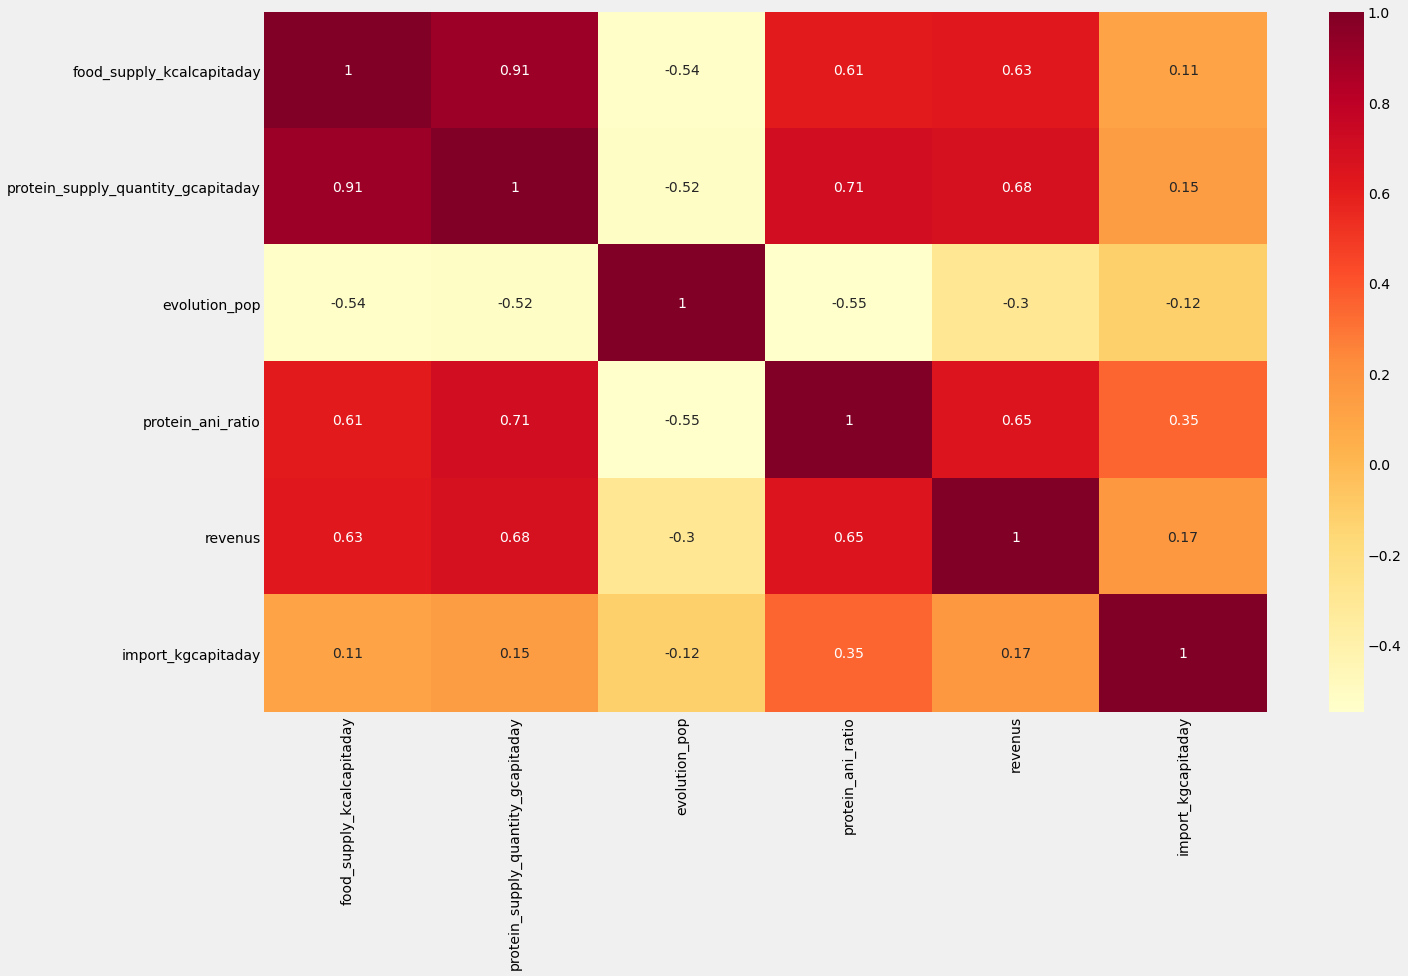

In [217]:
# Matrice corrélation
corr_matrix=data.corr()

sns.heatmap(corr_matrix,annot=True,cmap="YlOrRd")

## Classification

### Classification n

In [0]:
# préparation des données pour le clustering
del data["code"]
data.set_index("country",inplace=True)

X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

#### Dendrogramme 6 clusters

In [0]:
# fonction 6 clusters
def plot_dendrogram_6(Z, names):
    plt.figure(figsize=(10,6))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
      Z,
      truncate_mode='lastp',  # show only the last p merged clusters
      p=6,  # show only the last p merged clusters
      labels = names,
)
    plt.show()

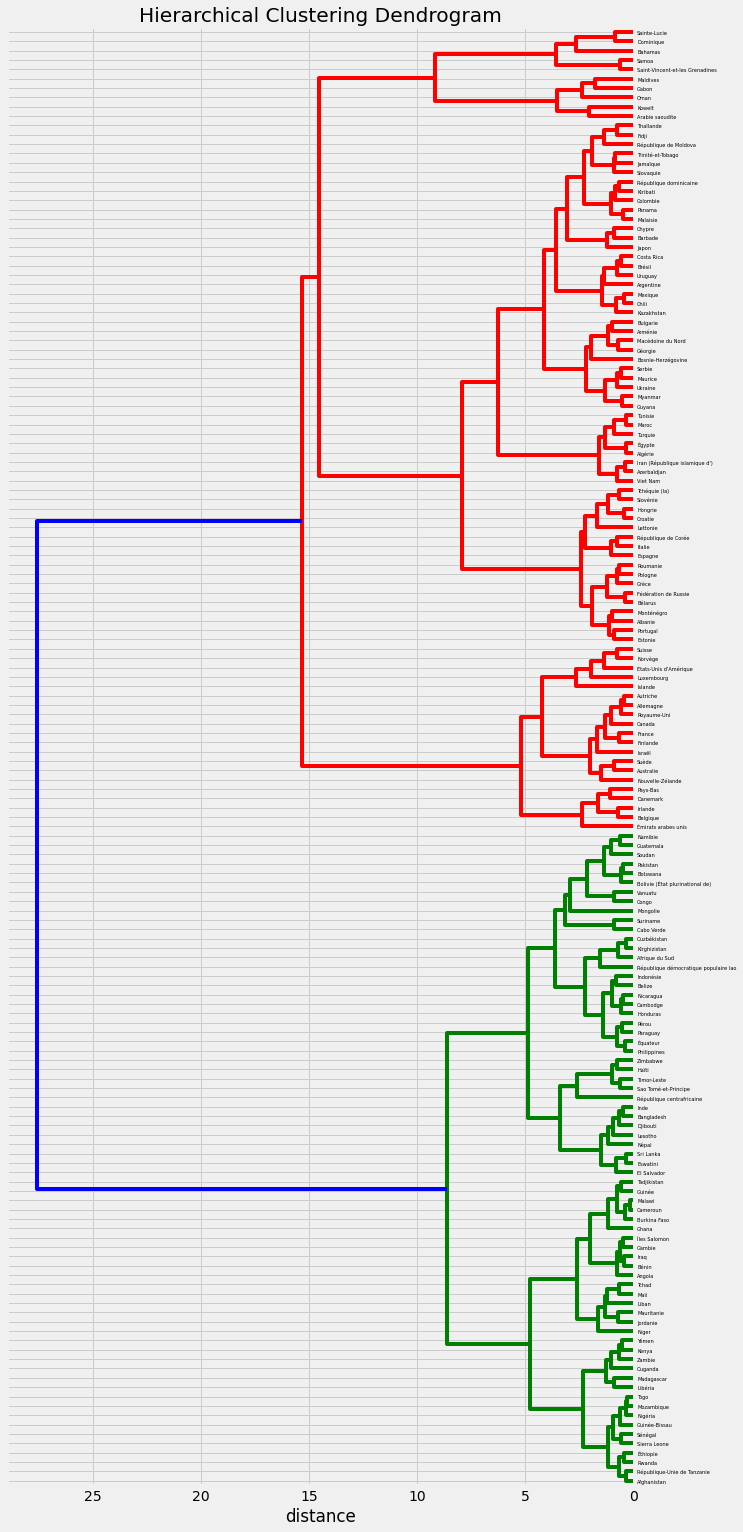

In [219]:
plot_dendrogram(Z, names)

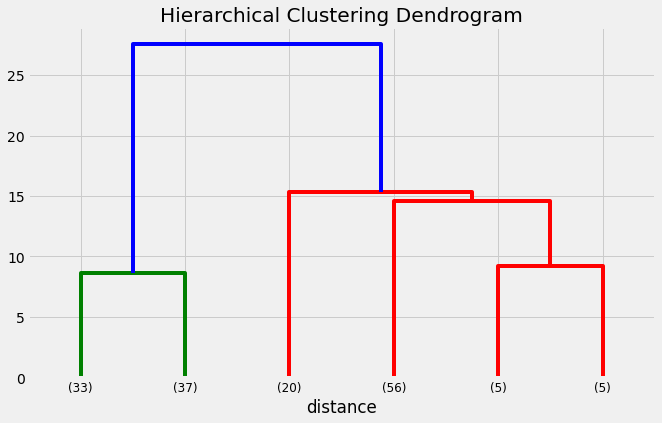

In [94]:
# Affichage du dendrogramme
plot_dendrogram_6(Z, names)

In [95]:
# Création df des clusters
k=6
clusters = pd.DataFrame(fcluster(Z, k, criterion='maxclust'))

# Renommage colonne
clusters.columns = ['clusters']

# Jointure externe data & cluster
data= pd.concat([data.reset_index(), clusters], axis=1)


data.head(5)

,country,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,revenus,import_kgcapitaday,clusters
0,Afghanistan,2675.545301,72.282003,12.5,0.146094,466.079081,0.002189,1
1,Afrique du Sud,3258.418120,91.019791,6.2,0.379698,4941.627549,0.024701,2
2,Albanie,3874.981711,132.904634,-0.7,0.499004,4105.150515,0.036097,4
3,Algérie,3616.418120,100.509791,8.5,0.265223,3257.676874,0.000132,4
4,Allemagne,3830.418120,111.729791,1.8,0.564576,37791.483568,0.027908,3


In [96]:
#Description des clusters
data.groupby(["clusters" ]).mean()

,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,revenus,import_kgcapitaday
clusters,,,,,,
1,2718.625279,68.665095,12.093939,0.194681,1128.737339,0.008124
2,2786.797487,73.619680,6.275676,0.314920,2477.764935,0.014275
3,3831.010826,118.974844,3.390000,0.550305,43635.705925,0.033655
4,3465.835959,99.950891,1.832143,0.442884,9331.712691,0.016289
5,3155.832667,94.104296,16.400000,0.457690,13611.744393,0.078670
6,2980.432667,87.760296,2.000000,0.546401,10125.944530,0.187987


In [97]:
# Identification cluster de la France
data.loc[data["country"]=="France"]

,country,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,revenus,import_kgcapitaday,clusters
44,France,3929.199916,122.612212,1.5,0.568133,32671.755086,0.02138,3


* France cluster 3

In [98]:
len(data[data["clusters"]==3])

20

* 20 pays avec la France

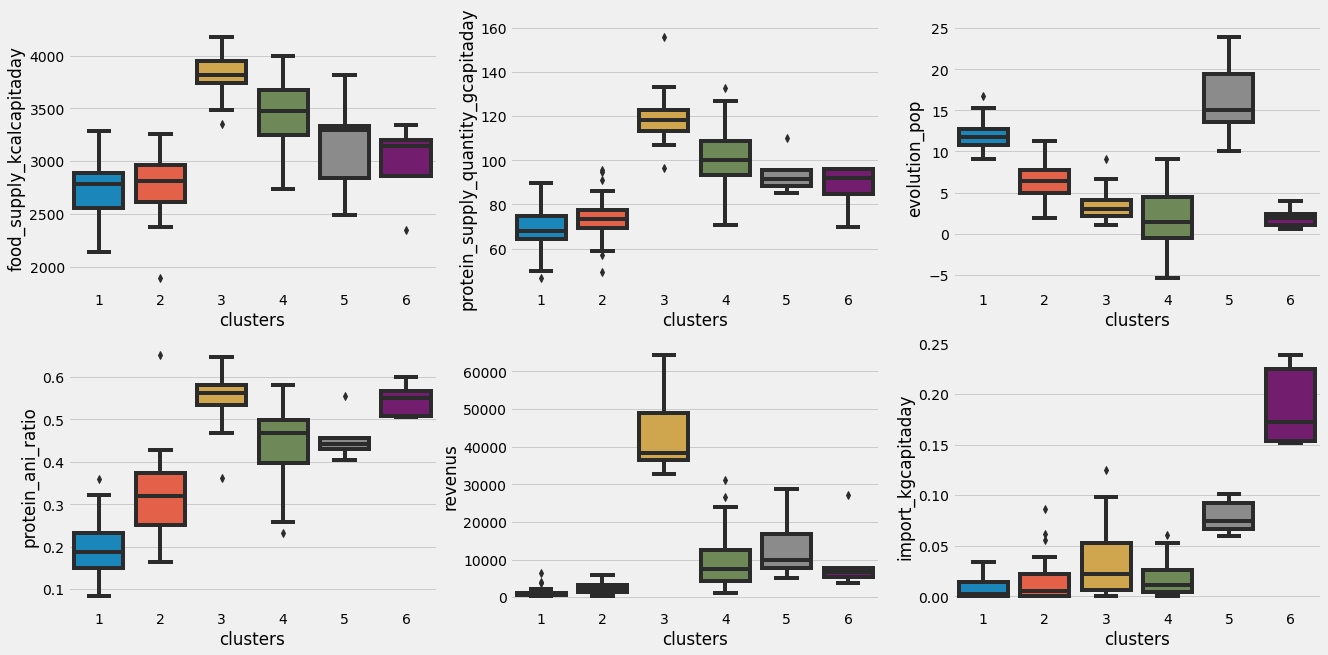

In [99]:
# graphiques variables selon clusters
plt.figure(figsize=(20,10))
plt.subplot(231)
sns.boxplot(x=data["clusters"], y = data["food_supply_kcalcapitaday"])
plt.subplot(232)
sns.boxplot(x=data["clusters"], y = data["protein_supply_quantity_gcapitaday"])
plt.subplot(233)
sns.boxplot(x=data["clusters"], y = data["evolution_pop"])
plt.subplot(234)
sns.boxplot(x=data["clusters"], y = data["protein_ani_ratio"])
plt.subplot(235)
sns.boxplot(x=data["clusters"], y = data["revenus"])
plt.subplot(236)
sns.boxplot(x=data["clusters"], y = data["import_kgcapitaday"])
plt.show()

## ACP

### Eboulis valeurs propres

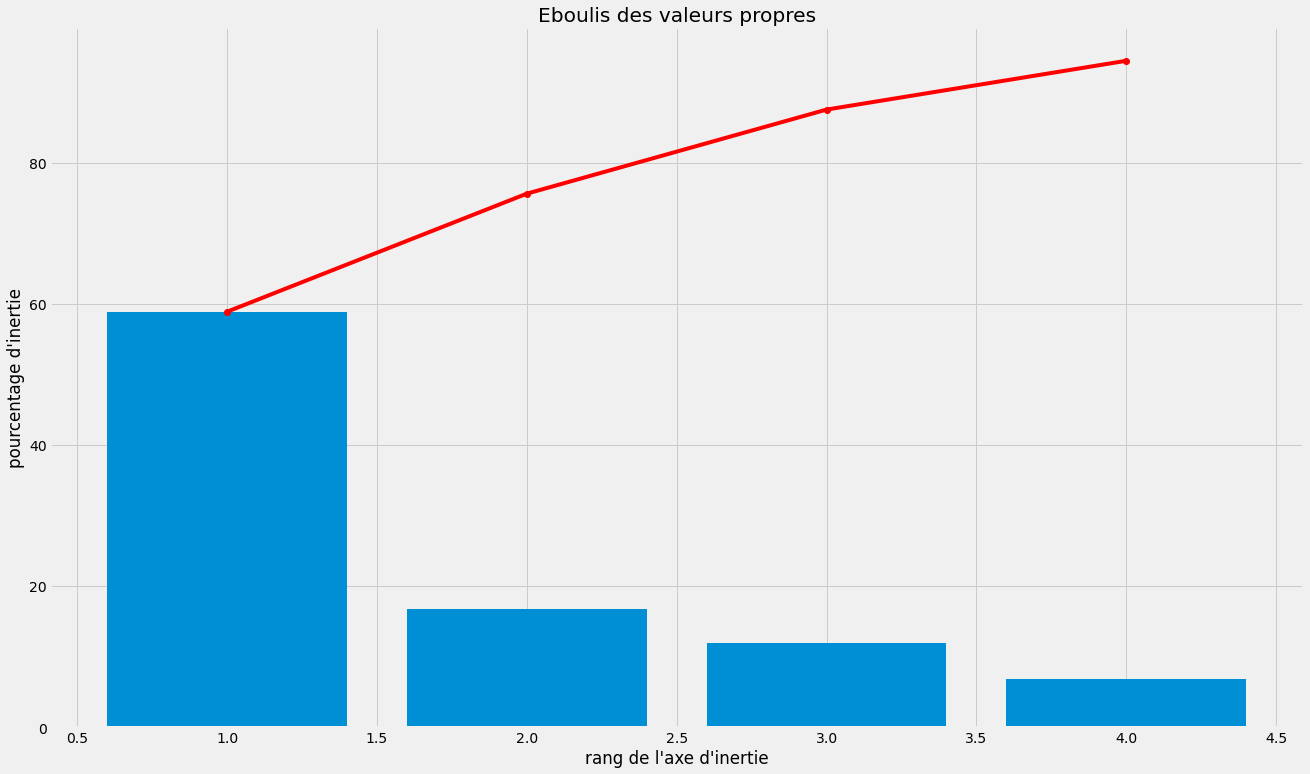

In [100]:
# préparation des données 
data.set_index("country",inplace=True)

# choix du nombre de composantes à calculer
n_comp = 4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["food_supply_kcalcapitaday",	"protein_supply_quantity_gcapitaday",	"evolution_pop",
                 "protein_ani_ratio",	"revenus", "import_kgcapitaday"	]]
                 

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data.index # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

### Cercles des corrélations 1er plan factoriel

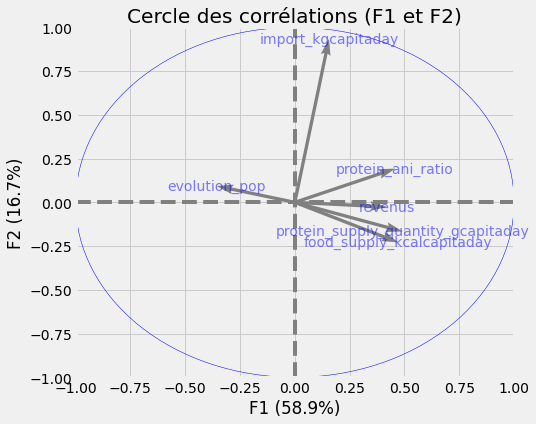

In [101]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

In [102]:
# composantes F1
# food",	"protein",	"pop",	"ratio" , "revenus", "import"
f1 = pca.components_[0]
print(f1)

[ 0.47185153  0.49129411 -0.35628902  0.45737937  0.41895056  0.15597728]


* F1 caractérise les pays qui présentent l'ensemble des variables alimentaires et de revenus, en opposition avec l'augmentation population. 

In [103]:
# composantes F2
# food",	"protein",	"pop",	"ratio" , "revenus", "import"
f2 = pca.components_[1]
print(f2)

[-0.22885592 -0.16638206  0.09322301  0.19255092 -0.02602709  0.93461125]


* F2 caractérise l'importation

In [104]:
# Projection des individus
X_projected = pca.transform(X_scaled)

# Obtention F1 & F2
data_fn = pd.DataFrame(X_projected, index=data.index,columns=["F"+str(i+1) for i in range(4)])
data_fn = data_fn.reset_index()
data_fn = data_fn[["country","F1", "F2"]]

# merge data & data_1
data = pd.merge(data,data_fn, left_on="country", right_on="country")
data.head(5)

,country,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,revenus,import_kgcapitaday,clusters,F1,F2
0,Afghanistan,2675.545301,72.282003,12.5,0.146094,466.079081,0.002189,1,-2.454087,-0.332438
1,Afrique du Sud,3258.418120,91.019791,6.2,0.379698,4941.627549,0.024701,2,-0.049130,-0.015243
2,Albanie,3874.981711,132.904634,-0.7,0.499004,4105.150515,0.036097,4,2.414294,-0.323740
3,Algérie,3616.418120,100.509791,8.5,0.265223,3257.676874,0.000132,4,-0.157286,-0.963776
4,Allemagne,3830.418120,111.729791,1.8,0.564576,37791.483568,0.027908,3,2.844157,-0.260617


#### Projection individus 1er plan factoriel

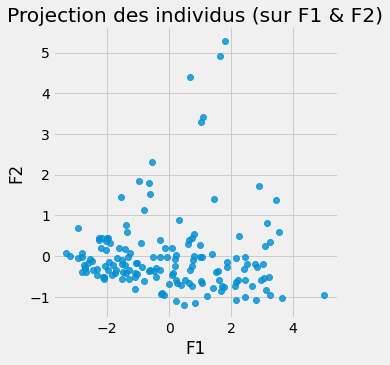

In [105]:
# Projection des individus selon variable illustrative
sns.lmplot(x="F1", y = "F2", data=data, fit_reg=False)
plt.title("Projection des individus (sur F1 & F2)")
plt.show()

#### Projection clusters 1er plan factoriel

In [106]:
#Récupération de clusters
cluster_cent = pd.DataFrame(data.groupby(["clusters" ]).mean())
cluster_cent = cluster_cent.reset_index()
cluster_cent.head(10)

,clusters,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,revenus,import_kgcapitaday,F1,F2
0,1,2718.625279,68.665095,12.093939,0.194681,1128.737339,0.008124,-2.272011,-0.122557
1,2,2786.797487,73.619680,6.275676,0.314920,2477.764935,0.014275,-1.234454,0.007248
2,3,3831.010826,118.974844,3.390000,0.550305,43635.705925,0.033655,3.050207,-0.178747
3,4,3465.835959,99.950891,1.832143,0.442884,9331.712691,0.016289,0.960500,-0.391912
4,5,3155.832667,94.104296,16.400000,0.457690,13611.744393,0.078670,-0.075960,1.600955
5,6,2980.432667,87.760296,2.000000,0.546401,10125.944530,0.187987,1.247765,4.258682


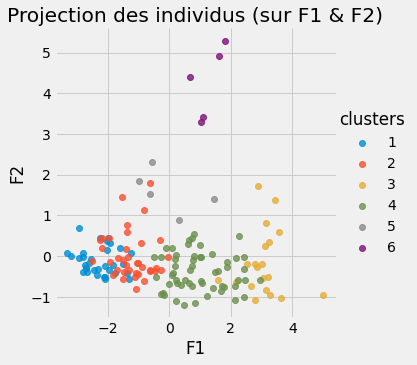

In [107]:
# Projection des individus selon variable illustrative
sns.lmplot(x="F1", y = "F2", hue="clusters", data=data, fit_reg=False)
plt.title("Projection des individus (sur F1 & F2)")
plt.show()

#### Projection centroides 1er plan factoriel

In [108]:
# Conservation F1 & F2
cluster_cent = cluster_cent[["clusters","F1","F2"]]
cluster_cent.head(10)

,clusters,F1,F2
0,1,-2.272011,-0.122557
1,2,-1.234454,0.007248
2,3,3.050207,-0.178747
3,4,0.960500,-0.391912
4,5,-0.075960,1.600955
5,6,1.247765,4.258682


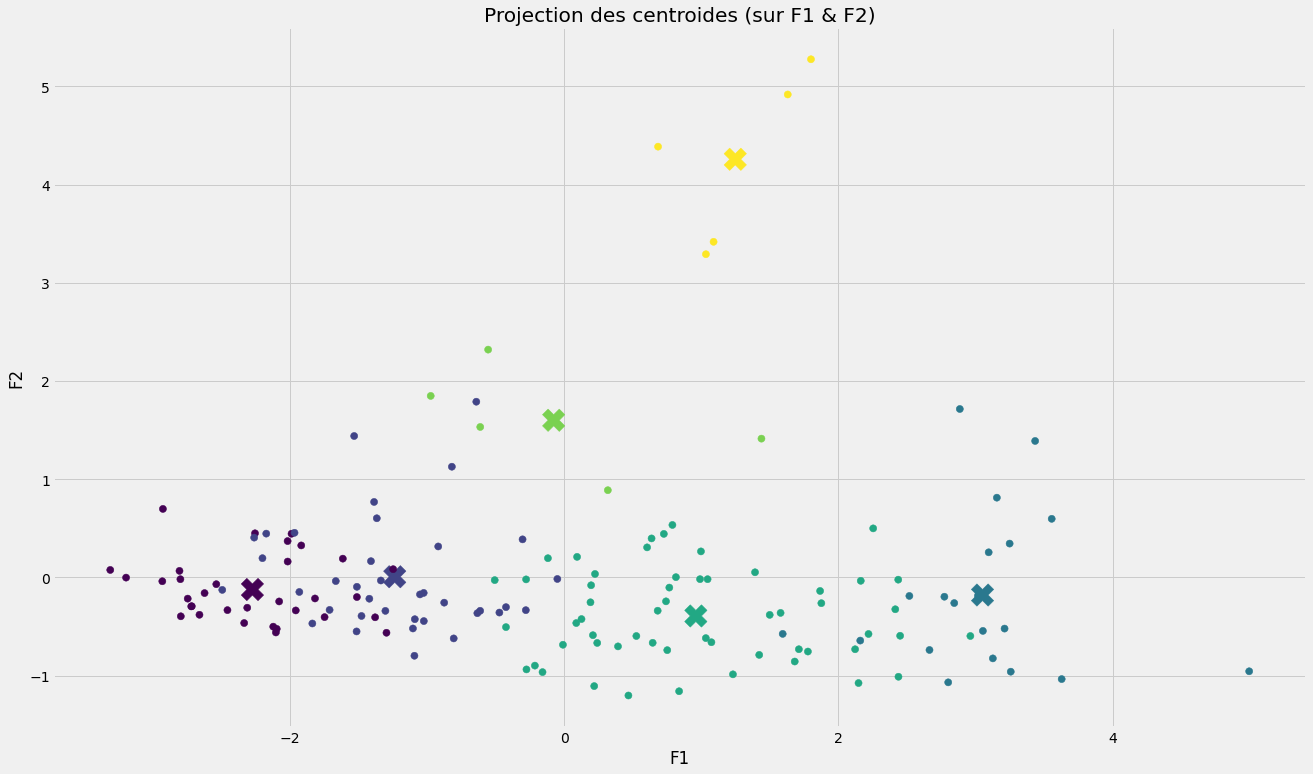

In [109]:
# projection individus et centroides
plt.scatter(x=cluster_cent["F1"], y = cluster_cent["F2"], c = cluster_cent["clusters"], s = 500, marker="X")
plt.scatter(x=data["F1"], y = data["F2"], c = data["clusters"], s = 50)
plt.title("Projection des centroides (sur F1 & F2)")
plt.xlabel("F1")
plt.ylabel("F2")
plt.show()

### Adhésion loi normale

#### Droites Henry / qq Plot

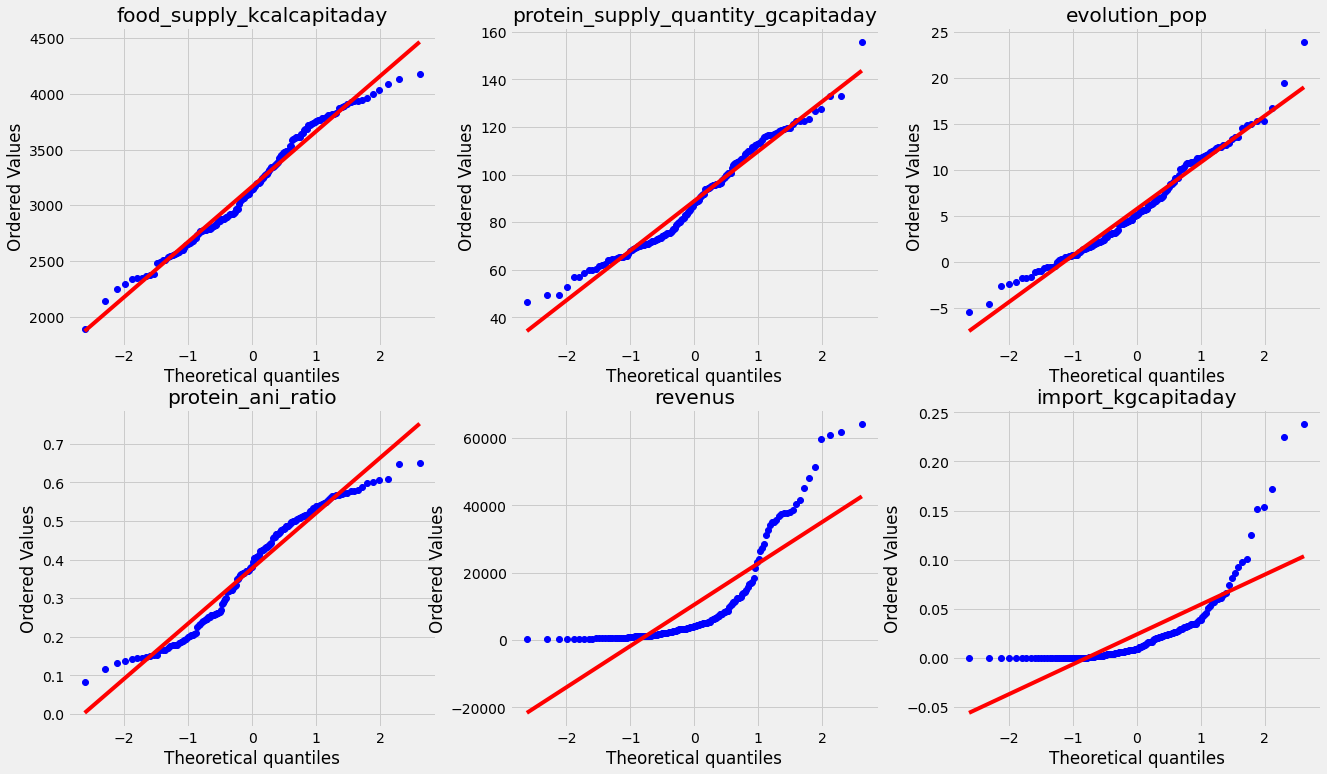

In [110]:
# droites de henry
plt.rcParams["figure.figsize"] = (20, 12)
plt.subplot(231)
st.probplot(data["food_supply_kcalcapitaday"], plot=plt)
plt.title("food_supply_kcalcapitaday")

plt.subplot(232)
st.probplot(data["protein_supply_quantity_gcapitaday"], plot=plt)
plt.title("protein_supply_quantity_gcapitaday")

plt.subplot(233)
st.probplot(data["evolution_pop"], plot=plt)
plt.title("evolution_pop")

plt.subplot(234)
st.probplot(data["protein_ani_ratio"], plot=plt)
plt.title("protein_ani_ratio")

plt.subplot(235)
st.probplot(data["revenus"], plot=plt)
plt.title("revenus")

plt.subplot(236)
st.probplot(data["import_kgcapitaday"], plot=plt)
plt.title("import_kgcapitaday")

plt.show()

#### Shapiro-Wilk

In [111]:
#Shapiro-Wilk
# seuil 2%

print("1/pvalue food_supply_kcalcapitaday")
print(sp.stats.shapiro(data["food_supply_kcalcapitaday"])[1])

print("1/pvalue protein_supply_quantity_gcapitaday")
print(sp.stats.shapiro(data["protein_supply_quantity_gcapitaday"])[1])

print("3/pvalue evolution_pop")
print(sp.stats.shapiro(data["evolution_pop"])[1])

print("4/pvalue protein_ani_ratio")
print(sp.stats.shapiro(data["protein_ani_ratio"])[1])

print("4/pvalue revenus")
print(sp.stats.shapiro(data["revenus"])[1])

print("4/pvalue import_kgcapitaday")
print(sp.stats.shapiro(data["import_kgcapitaday"])[1])

1/pvalue food_supply_kcalcapitaday
0.021700672805309296
1/pvalue protein_supply_quantity_gcapitaday
0.005938372574746609
3/pvalue evolution_pop
0.008894492872059345
4/pvalue protein_ani_ratio
7.078736234689131e-05
4/pvalue revenus
1.609133106794024e-16
4/pvalue import_kgcapitaday
1.9044431532895185e-18


* On ne rejete pas l'hypothèse d'adhésion loi normale pour food_supply_kcalcapitaday

#### food_supply_kcalcapitaday

##### Egalité variance

In [112]:
# sélection de données de 2 clusters
cluster_3_food = data[data["clusters"]==3]["food_supply_kcalcapitaday"]
cluster_4_food = data[data["clusters"]==4]["food_supply_kcalcapitaday"]

# comparaison variance
sp.stats.bartlett(cluster_3_food,cluster_4_food)

BartlettResult(statistic=2.9433909294692686, pvalue=0.08622953680166112)

* On ne rejette pas l'hypothèse d'égalité de variance.

##### Comparaison moyenne

In [113]:
# comparaison moyenne
sp.stats.ttest_ind(cluster_3_food,cluster_4_food, equal_var=True)

Ttest_indResult(statistic=5.2264360566962305, pvalue=1.5406675565407606e-06)

* on peux rejetter l'hypothèse nulle pour l'alternative.

## Caractérisation clusters

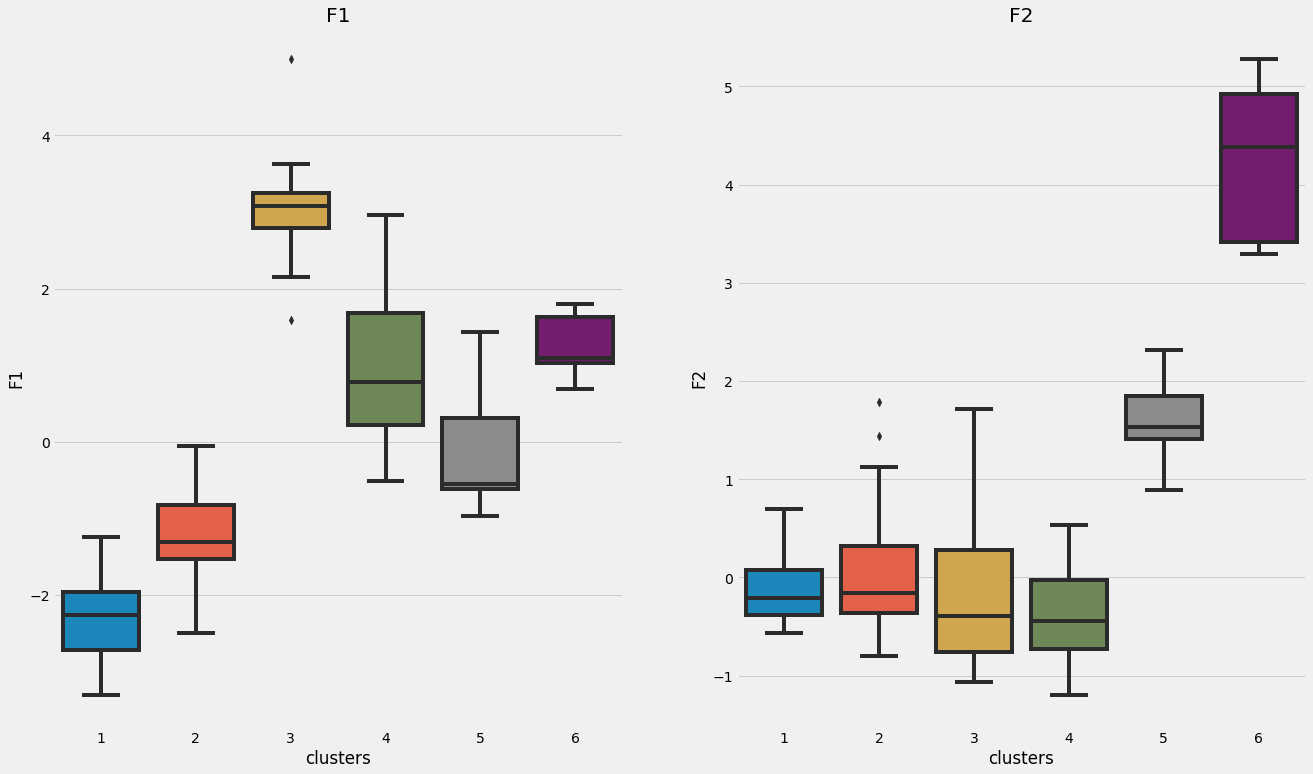

In [114]:
# graphiques cluster selon composantes
plt.rcParams["figure.figsize"] = (20, 12)
plt.subplot(121)
sns.boxplot( x=data["clusters"], y=data["F1"])
plt.title("F1")

plt.subplot(122)
sns.boxplot( x=data["clusters"], y=data["F2"])
plt.title("F2")

plt.show()

* cluster 3 semble le plus intéréssant.


In [115]:
# identification cluster France
data.loc[data["country"]=="France"]

,country,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,evolution_pop,protein_ani_ratio,revenus,import_kgcapitaday,clusters,F1,F2
44,France,3929.199916,122.612212,1.5,0.568133,32671.755086,0.02138,3,3.05298,-0.544103


In [116]:
# identification cluster 3
data[data["clusters"]==3]["country"]

4                  Allemagne
9                  Australie
10                  Autriche
15                  Belgique
28                    Canada
35                  Danemark
43                  Finlande
44                    France
62                   Irlande
63                   Islande
64                    Israël
78                Luxembourg
97                   Norvège
98          Nouvelle-Zélande
106                 Pays-Bas
112              Royaume-Uni
130                   Suisse
132                    Suède
151      Émirats arabes unis
153    États-Unis d'Amérique
Name: country, dtype: object

In [0]:
# Conservation données complètes cluster_3
cluster_3 = data[data["clusters"]==3]

In [0]:
# préparation données
cluster_3.set_index("country",inplace=True)
names = cluster_3.index 
temp = cluster_3[["F1","F2"]]

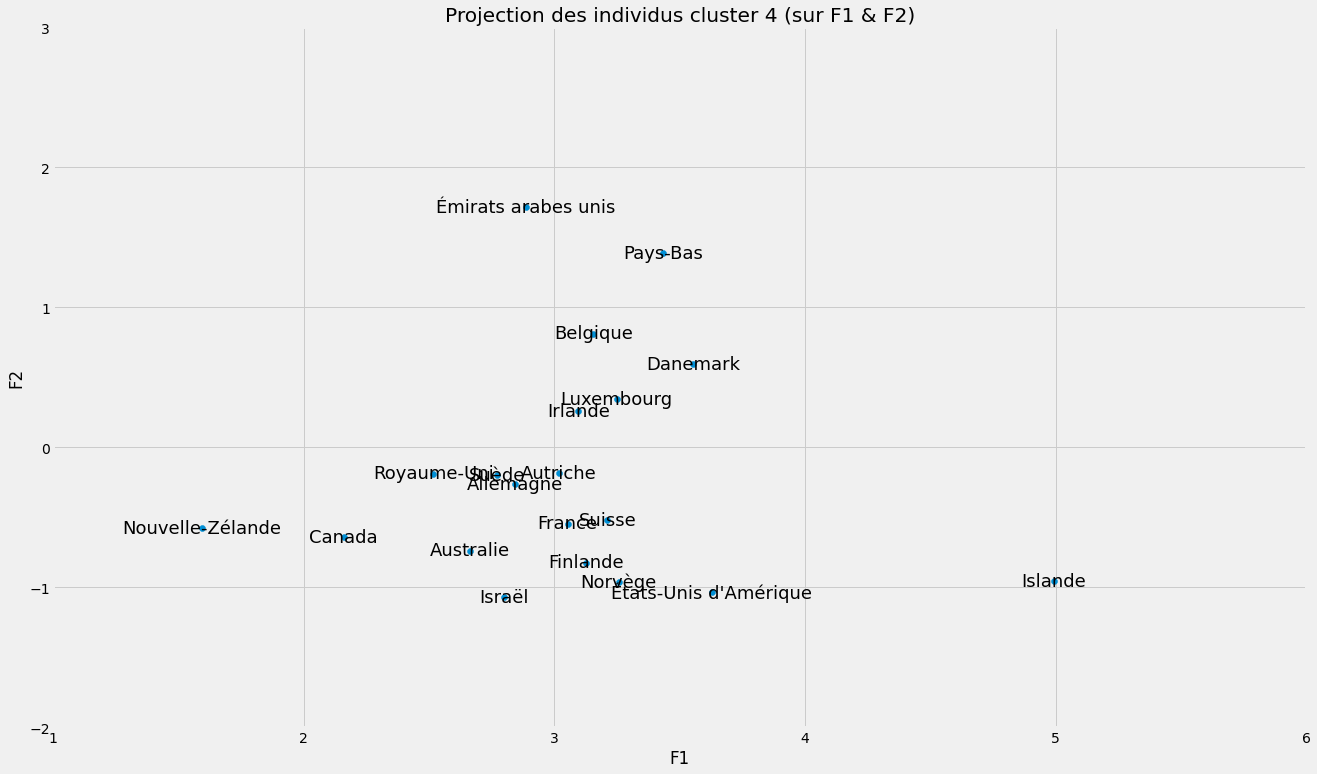

In [119]:
# Projection des individus

plt.scatter(np.array(temp)[:, 0], np.array(temp)[:, 1])
for i,(x,y) in enumerate(np.array(temp)[:,[0,1]]):
                    plt.text(x, y, names[i],
                              fontsize='18', ha='center',va='center')
                    
bound = np.max(np.abs(np.array(temp)[:,[0,1]])) * 1.1
plt.xlim([1,6])
plt.ylim([-2,3])
plt.title("Projection des individus cluster 4 (sur F1 & F2)")
plt.xlabel("F1")
plt.ylabel("F2")
plt.show()

In [120]:
# identification cluster 6
data[data["clusters"]==6]["country"]

12                             Bahamas
37                           Dominique
120    Saint-Vincent-et-les Grenadines
121                       Sainte-Lucie
122                              Samoa
Name: country, dtype: object

In [0]:
# Conservation données complètes cluster_4
cluster_6 = data[data["clusters"]==6]

In [0]:
# préparation données
cluster_6.set_index("country",inplace=True)


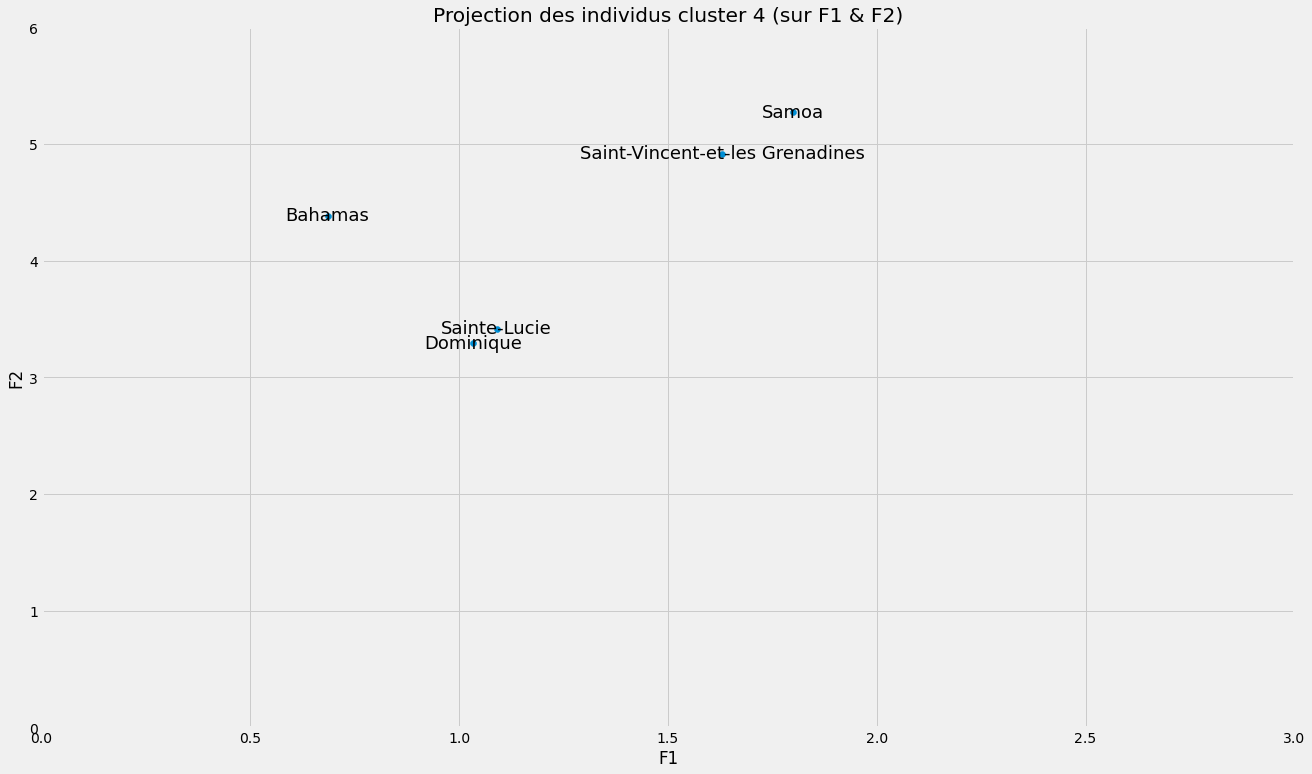

In [123]:
# Projection des individus
names = cluster_6.index 
temp = cluster_6[["F1","F2"]]
plt.scatter(np.array(temp)[:, 0], np.array(temp)[:, 1])
for i,(x,y) in enumerate(np.array(temp)[:,[0,1]]):
                    plt.text(x, y, names[i],
                              fontsize='18', ha='center',va='center')
                    
bound = np.max(np.abs(np.array(temp)[:,[0,1]])) * 1.1
plt.xlim([0,3])
plt.ylim([0,6])
plt.title("Projection des individus cluster 4 (sur F1 & F2)")
plt.xlabel("F1")
plt.ylabel("F2")
plt.show()

# Téléchargement données finales

In [0]:
# données complètes
cluster_projet_5 = data[["country","clusters"]]
from google.colab import files
cluster_projet_5.to_csv('cluster_projet_5.csv') 
files.download('cluster_projet_5.csv')

In [0]:
# Clusters
cluster_cent.to_csv('centroides_projet_5.csv') 
files.download('centroides_projet_5.csv')
